<a href="https://colab.research.google.com/github/SunYutongAmber/Cryptopunks_tweets_data_analysis/blob/main/code/Analysis_cryptopunk_tweets_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=54591dcef2b09637570f050de3c0282d974b3346bbbfe1b54083d3117787a0b8
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=84fd4737d2aafe792abb5dd2c3b650a079d7da8b7a2ed86d23695fd8fd5f9a28
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [ ]:
!pip install pytrends 
!pip install psutil requests
import pandas as pd
import pytrends
from pytrends.request import TrendReq
import pandas as pd
import re
from datetime import datetime
import time
from scipy.stats import spearmanr
import plotly.express as px
from scipy import stats
import nltk
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly import tools as tls
import plotly.graph_objs as go
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
from nltk import tokenize
import matplotlib as plt
from matplotlib import *
import sys
from pylab import *
import seaborn as sns
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim.corpora as corpora
from pprint import pprint
from gensim.models.coherencemodel import CoherenceModel
from google.colab import drive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16127 sha256=ded02d8a1fc7f95c50a83c1445c7ffeb71dd241a79f71f19dab9f1f20d873c07
  Stored in directory: /root/.cache/pip/wheels/e8/78/c8/18d4f4804753e14416809b365773220c48b41fe5387f2bb6b9
Successfully built pytrends
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working

/usr/local/lib/python3.8/dist-packages/past/builtins/misc.py:4: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working

/usr/local/lib/python3.8/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning:

`scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Data

##Cryptopunks Dataset

In [ ]:
df_cryp = pd.read_csv('https://raw.githubusercontent.com/SunYutongAmber/Cryptopunks_tweets_data_analysis/main/data/queried_tweets_data.csv').drop(["Unnamed: 0"], axis = 1)
df_cryp

Date  \
0     2022-02-14 23:42:41+00:00   
1     2022-02-14 23:32:29+00:00   
2     2022-02-14 23:22:49+00:00   
3     2022-02-14 23:13:04+00:00   
4     2022-02-14 22:56:55+00:00   
...                         ...   
2941  2022-01-15 01:30:21+00:00   
2942  2022-01-15 00:52:36+00:00   
2943  2022-01-15 00:14:53+00:00   
2944  2022-01-15 00:10:48+00:00   
2945  2022-01-15 00:02:55+00:00   

                                                 Tweets  
0     In the words of KDANYE our vision is KRYSTAL K...  
1     My crypto crazy collection is in @opensea \nTh...  
2     Highest-ever #cryptopunks  sale nets $24 milli...  
3     2 NFTs Used as Collateral for $3M Loan on DeFi...  
4     Which is your favorite @AdamListerArt Studio P...  
...                                                 ...  
2941  Mr. Gary Vee buys Cryptoskull for 100 ETH. Pro...  
2942  Check out this item on OpenSea \n#cryptopunks ...  
2943  Punk 441 bought for 59.95 ETH ($197,936.91 USD...  
2944  Selling one punk to get several @Crypto_Skulls...  
2945  Punk 7969 bought for 61.95 ETH ($204,540.31 US...  

[2946 rows x 2 columns]

##Data Cleaning


1) Remove punctuation 

2) Convert the titles to lowercase 


In [ ]:
def clean_data(df):
  df['paper_text_processed'] = \
  df['Tweets'].map(lambda x: re.sub('[,\.!?]', '', str(x)))
  df['paper_text_processed'] = \
  df['paper_text_processed'].map(lambda x: x.lower())
  return df

<>:3: DeprecationWarning:

invalid escape sequence \.

<>:3: DeprecationWarning:

invalid escape sequence \.

<ipython-input-4-8410d0ea730d>:3: DeprecationWarning:

invalid escape sequence \.



In [ ]:
df_cryp=clean_data(df_cryp)

#Times Series

##Average Tweet Length & Volume


1) Calculate Tweet Volume by date

2) Calculate Average Tweet Length by Date


In [ ]:
def ts_tweet(df):
  df['len'] = df['paper_text_processed'].str.split().str.len()
  df["Date"]=pd.to_datetime(df["Date"],errors='coerce',utc=True)
  df["day"]=df["Date"].dt.date
  c=pd.DataFrame({'Tweet Counts' : df.groupby(by=["day"])["Tweets"].count()}).reset_index()
  tweet_volume=c["Tweet Counts"].values.tolist()
  a=pd.DataFrame({'Tweet Length' : df.groupby(by=["day"])["len"].mean()}).reset_index()
  tweet_len=a["Tweet Length"].values.tolist()
  return tweet_len, tweet_volume, df

In [ ]:
tweet_len_crypto, tweet_volume_crypto, df_crypto = ts_tweet(df_cryp)[0], ts_tweet(df_cryp)[1], ts_tweet(df_cryp)[2]
#del tweet_len_crypto[0:2]
#del tweet_volume_crypto[0:2]

##Google Trend

In [ ]:
def google_trend(keywords, date_interval):
  pytrend = TrendReq(tz=0)
  KEYWORDS=[keywords] 
  KEYWORDS_CODES=[pytrend.suggestions(keyword=i)[0] for i in KEYWORDS] 
  df_CODES= pd.DataFrame(KEYWORDS_CODES)
  EXACT_KEYWORDS=df_CODES['mid'].to_list()
  DATE_INTERVAL=date_interval
  COUNTRY=["US"] #Use this link for iso country code
  CATEGORY=0 # Use this link to select categories
  SEARCH_TYPE='' #default is 'web searches',others include 'images','news','youtube','froogle' (google shopping)
  Individual_EXACT_KEYWORD = list(zip(*[iter(EXACT_KEYWORDS)]*1))
  Individual_EXACT_KEYWORD = [list(x) for x in Individual_EXACT_KEYWORD]
  dicti = {}
  i = 1
  for Country in COUNTRY:
    for keyword in Individual_EXACT_KEYWORD:
      pytrend.build_payload(kw_list=keyword, 
                              timeframe = DATE_INTERVAL, 
                              geo = Country, 
                              cat=CATEGORY,
                              gprop=SEARCH_TYPE) 
      dicti[i] = pytrend.interest_over_time()
      i+=1
  df_trends = pd.concat(dicti, axis=1)
  df_trends.columns = df_trends.columns.droplevel(0) #drop outside header
  df_trends = df_trends.drop('isPartial', axis = 1) #drop "isPartial"
  df_trends.reset_index(level=0,inplace=True) #reset_index
  df_trends.columns=['date','google trend'] #change column names
  return df_trends

In [ ]:
len(tweet_len_crypto)


31

In [ ]:
df_trend_crypto=google_trend("Cryptopunks",'2022-01-15 2022-02-14')
df_trend_crypto["tweet_volume"]=tweet_volume_crypto
df_trend_crypto["tweet_len"]=tweet_len_crypto

In [ ]:
df_trend_crypto

date  google trend  tweet_volume  tweet_len
0  2022-01-15            76            84  23.511905
1  2022-01-16            38            62  25.903226
2  2022-01-17            28            76  24.434211
3  2022-01-18            89            72  26.013889
4  2022-01-19            53            79  21.810127
5  2022-01-20            71            73  19.863014
6  2022-01-21            64            81  23.518519
7  2022-01-22            70            67  21.462687
8  2022-01-23            63            85  23.223529
9  2022-01-24            47            82  23.219512
10 2022-01-25            81           187  20.545455
11 2022-01-26            40           118  21.813559
12 2022-01-27            70            82  23.963415
13 2022-01-28            46           134  21.932836
14 2022-01-29            61            83  23.397590
15 2022-01-30            82            78  22.525641
16 2022-01-31           100           112  23.026786
17 2022-02-01            72            88  23.840909
18 2022-02-02            88            96  22.093750
19 2022-02-03            75           100  23.010000
20 2022-02-04            43            97  23.752577
21 2022-02-05            75            60  22.500000
22 2022-02-06            74            79  25.354430
23 2022-02-07            76            79  23.253165
24 2022-02-08            63           119  24.142857
25 2022-02-09            57           131  23.114504
26 2022-02-10            33           101  25.069307
27 2022-02-11            60            77  24.649351
28 2022-02-12            64           112  21.991071
29 2022-02-13            76           158  23.120253
30 2022-02-14            48            94  22.234043

##Spearman correlation test


In [ ]:
#df_trend_blm = pd.read_csv('/content/drive/MyDrive/ICWSM-22/Final-Data/df_trend_blm.csv')
#df_trend_sah = pd.read_csv('/content/drive/MyDrive/ICWSM-22/Final-Data/df_trend_sah.csv')

In [ ]:
def spearman_corr(df_trends,names):
  coef, p = spearmanr(df_trends["tweet_volume"], df_trends["google trend"])
  print(names)
  print('Spearmans correlation coefficient: %.3f' % coef)
  print('P-value: %.3f' % p)

In [ ]:
spearman_corr(df_trend_crypto,"#Cryptopunks")

#Cryptopunks
Spearmans correlation coefficient: -0.028
P-value: 0.880


In [ ]:
def wordcount(df):
  print("the mean wordcount for each tweet is "+ str(df['len'].mean()))
  print("the standard deviation is "+ str(df['len'].std()))
  print("the minimum wordcount for each tweet is "+ str(df['len'].min()))
  print("the maximum wordcount for each tweet is "+ str(df['len'].max()))

In [ ]:
#wordcount(df_trend_crypto)

In [ ]:
df_trend_crypto["tweet_len"]

0     23.511905
1     25.903226
2     24.434211
3     26.013889
4     21.810127
5     19.863014
6     23.518519
7     21.462687
8     23.223529
9     23.219512
10    20.545455
11    21.813559
12    23.963415
13    21.932836
14    23.397590
15    22.525641
16    23.026786
17    23.840909
18    22.093750
19    23.010000
20    23.752577
21    22.500000
22    25.354430
23    23.253165
24    24.142857
25    23.114504
26    25.069307
27    24.649351
28    21.991071
29    23.120253
30    22.234043
Name: tweet_len, dtype: float64

##Plot Average Tweet Length (figure2)

In [ ]:
trace1 = go.Scatter(x=df_trend_crypto["date"], y=df_trend_crypto["tweet_len"], name=" #Cryptopunks")

trace2 = go.Scatter(x=df_trend_crypto["date"], y=[25.3]*len(df_trend_crypto["date"]), name="Mean",line=dict(color='blue', width=1,
                    dash='dash'))


fig = make_subplots(rows=2, cols=1,
                        print_grid=True,
                        horizontal_spacing=0.5,
                        vertical_spacing=0.3, subplot_titles=("for #Cryptopunks","for #Cryptopunks")
                         )

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.show()
#fig.update_layout(trace1 = dict(range=[<from_value>, <to_value>]))
# Set x-axis title
#fig.update_xaxes(title_text="Date",tickfont_size=13,)
#fig.update_layout(xaxis1 = dict(range=["2022-01-15","2022-02-14"]))

# Set y-axes titles
#fig.update_yaxes(title_text="No. of Words per Tweet", tickfont_size=13, secondary_y=False,range=[15,35])

This is the format of your plot grid:
[ (1,1) x,y   ]
[ (2,1) x2,y2 ]



/usr/local/lib/python3.8/dist-packages/plotly/basedatatypes.py:2307: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.


/usr/local/lib/python3.8/dist-packages/plotly/basedatatypes.py:2307: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.




##Plot Google Trend & Tweet Volume (figure3)

In [ ]:
def figure3(df_trends, names):
  fig = make_subplots(rows=2, cols=1) 
  fig = make_subplots( specs=[[{"secondary_y": True}]])
  fig.add_trace(
      go.Scatter(x=df_trends["date"], y=df_trends["tweet_volume"], name="Tweet Volume"),
      secondary_y=False,
  )
  fig.add_trace(
      go.Scatter(x=df_trends["date"], y=df_trends["google trend"], name="Google Trend"),
      secondary_y=True,
  )
  fig.update_layout(
      title_text="Time Series for Google Trend and Tweet Volume for "+names
  )
  fig.update_xaxes(title_text="Date")
  fig.update_yaxes(title_text="<b>Tweet Volume</b> (tweet)", secondary_y=False)
  fig.update_yaxes(title_text="<b>Google Trend</b> (topic popularity)", secondary_y=True)
  fig.show()

In [ ]:
figure3(df_trend_crypto,"#Cryptopunks")

#Seasonal Effects

In [ ]:
df_trend_crypto["Date"]=pd.to_datetime(df_trend_crypto["date"])
df_trend_crypto["Week"]=df_trend_crypto["date"].dt.weekday
df_trend_crypto["hours"]=df_trend_crypto["date"].dt.hour

a=pd.DataFrame({'tweet_volume' : df_trend_crypto.groupby(by=["hours"])["date"].count()}).reset_index()
b=pd.DataFrame({'tweet_volume' : df_trend_crypto.groupby(by=["Week"])["date"].count()}).reset_index()
tweet_volume_weeks=b["tweet_volume"].values.tolist()

c=pd.DataFrame({'tweet_volume' : df_trend_crypto.groupby(by=["Date","Week"])["date"].count()}).reset_index()
d=pd.DataFrame({'tweet_volume' : df_trend_crypto.groupby(by=["Date","hours"])["date"].count()}).reset_index()

for i in range(len(c["Date"])):  
    if c['Week'][i] == 0.0:
        c['Week'][i] = 'Monday'
    if c['Week'][i] == 1.0:
        c['Week'][i] = 'Tuesday'  
    if c['Week'][i] == 2.0:
        c['Week'][i] = 'Wednesday'
    if c['Week'][i] == 3.0:
        c['Week'][i] = 'Thursday'
    if c['Week'][i] == 4.0:
        c['Week'][i] = 'Friday'
    if c['Week'][i] == 5.0:
        c['Week'][i] = 'Saturday'
    if c['Week'][i] == 6.0:
        c['Week'][i] = 'Sunday'

c["Weekday"]=c["Week"]
weekDays = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
week={'Weekday': weekDays, 'Tweet Volume': tweet_volume_weeks}
week= pd.DataFrame(data=week)
week

<ipython-input-32-2ab4be5846df>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Weekday  Tweet Volume
0     Monday             5
1    Tuesday             4
2  Wednesday             4
3   Thursday             4
4     Friday             4
5   Saturday             5
6     Sunday             5

In [ ]:
fig = px.line(week, x='Weekday', y="Tweet Volume")
fig.update_layout(
    title_text="Weekly Tweet Volumn of #Stopasianhate"
)

# Set x-axis title
fig.update_xaxes(title_text="Weekday")

# Set y-axes titles
fig.update_yaxes(title_text="Tweet Volume", secondary_y=False)

In [ ]:
fig = px.box(c, x='Weekday', y="Date")
fig.update_layout(
    title_text="Weekly Tweet Volumn of #StopAsianHate (Boxplot)"
)
fig.show()

#Overall Frequency

In [ ]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
lmtzr=WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu',"u","e","i鈥檓",'use','https',"tco","i'm","-","de","amp","&amp;"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_cryp['tweet_without_stopwords'] = df_cryp["paper_text_processed"].apply(lambda x: ' '.join([lmtzr.lemmatize(word) for word in x.split() if word not in (stop_words)]))
df_cryp['tweet_without_stopwords'] = df_cryp["paper_text_processed"].apply(lambda x: ' '.join([lmtzr.lemmatize(word) for word in x.split() if word not in (stop_words)]))

In [ ]:
tokenSpace = tokenize.WhitespaceTokenizer()
def counter(text, columnText, quantity):
    allWords = ' '.join([text for text in text[columnText].astype('str')])
    tokenPhrase = tokenSpace.tokenize(allWords)
    frequency = nltk.FreqDist(tokenPhrase) 
    dfFrequency = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())}) 
    dfFrequency = dfFrequency.nlargest(columns = "Frequency", n = quantity)
    dfFrequency=dfFrequency.reset_index().reset_index()
    return dfFrequency

In [ ]:
df1=counter(df_cryp, 'tweet_without_stopwords', 20)


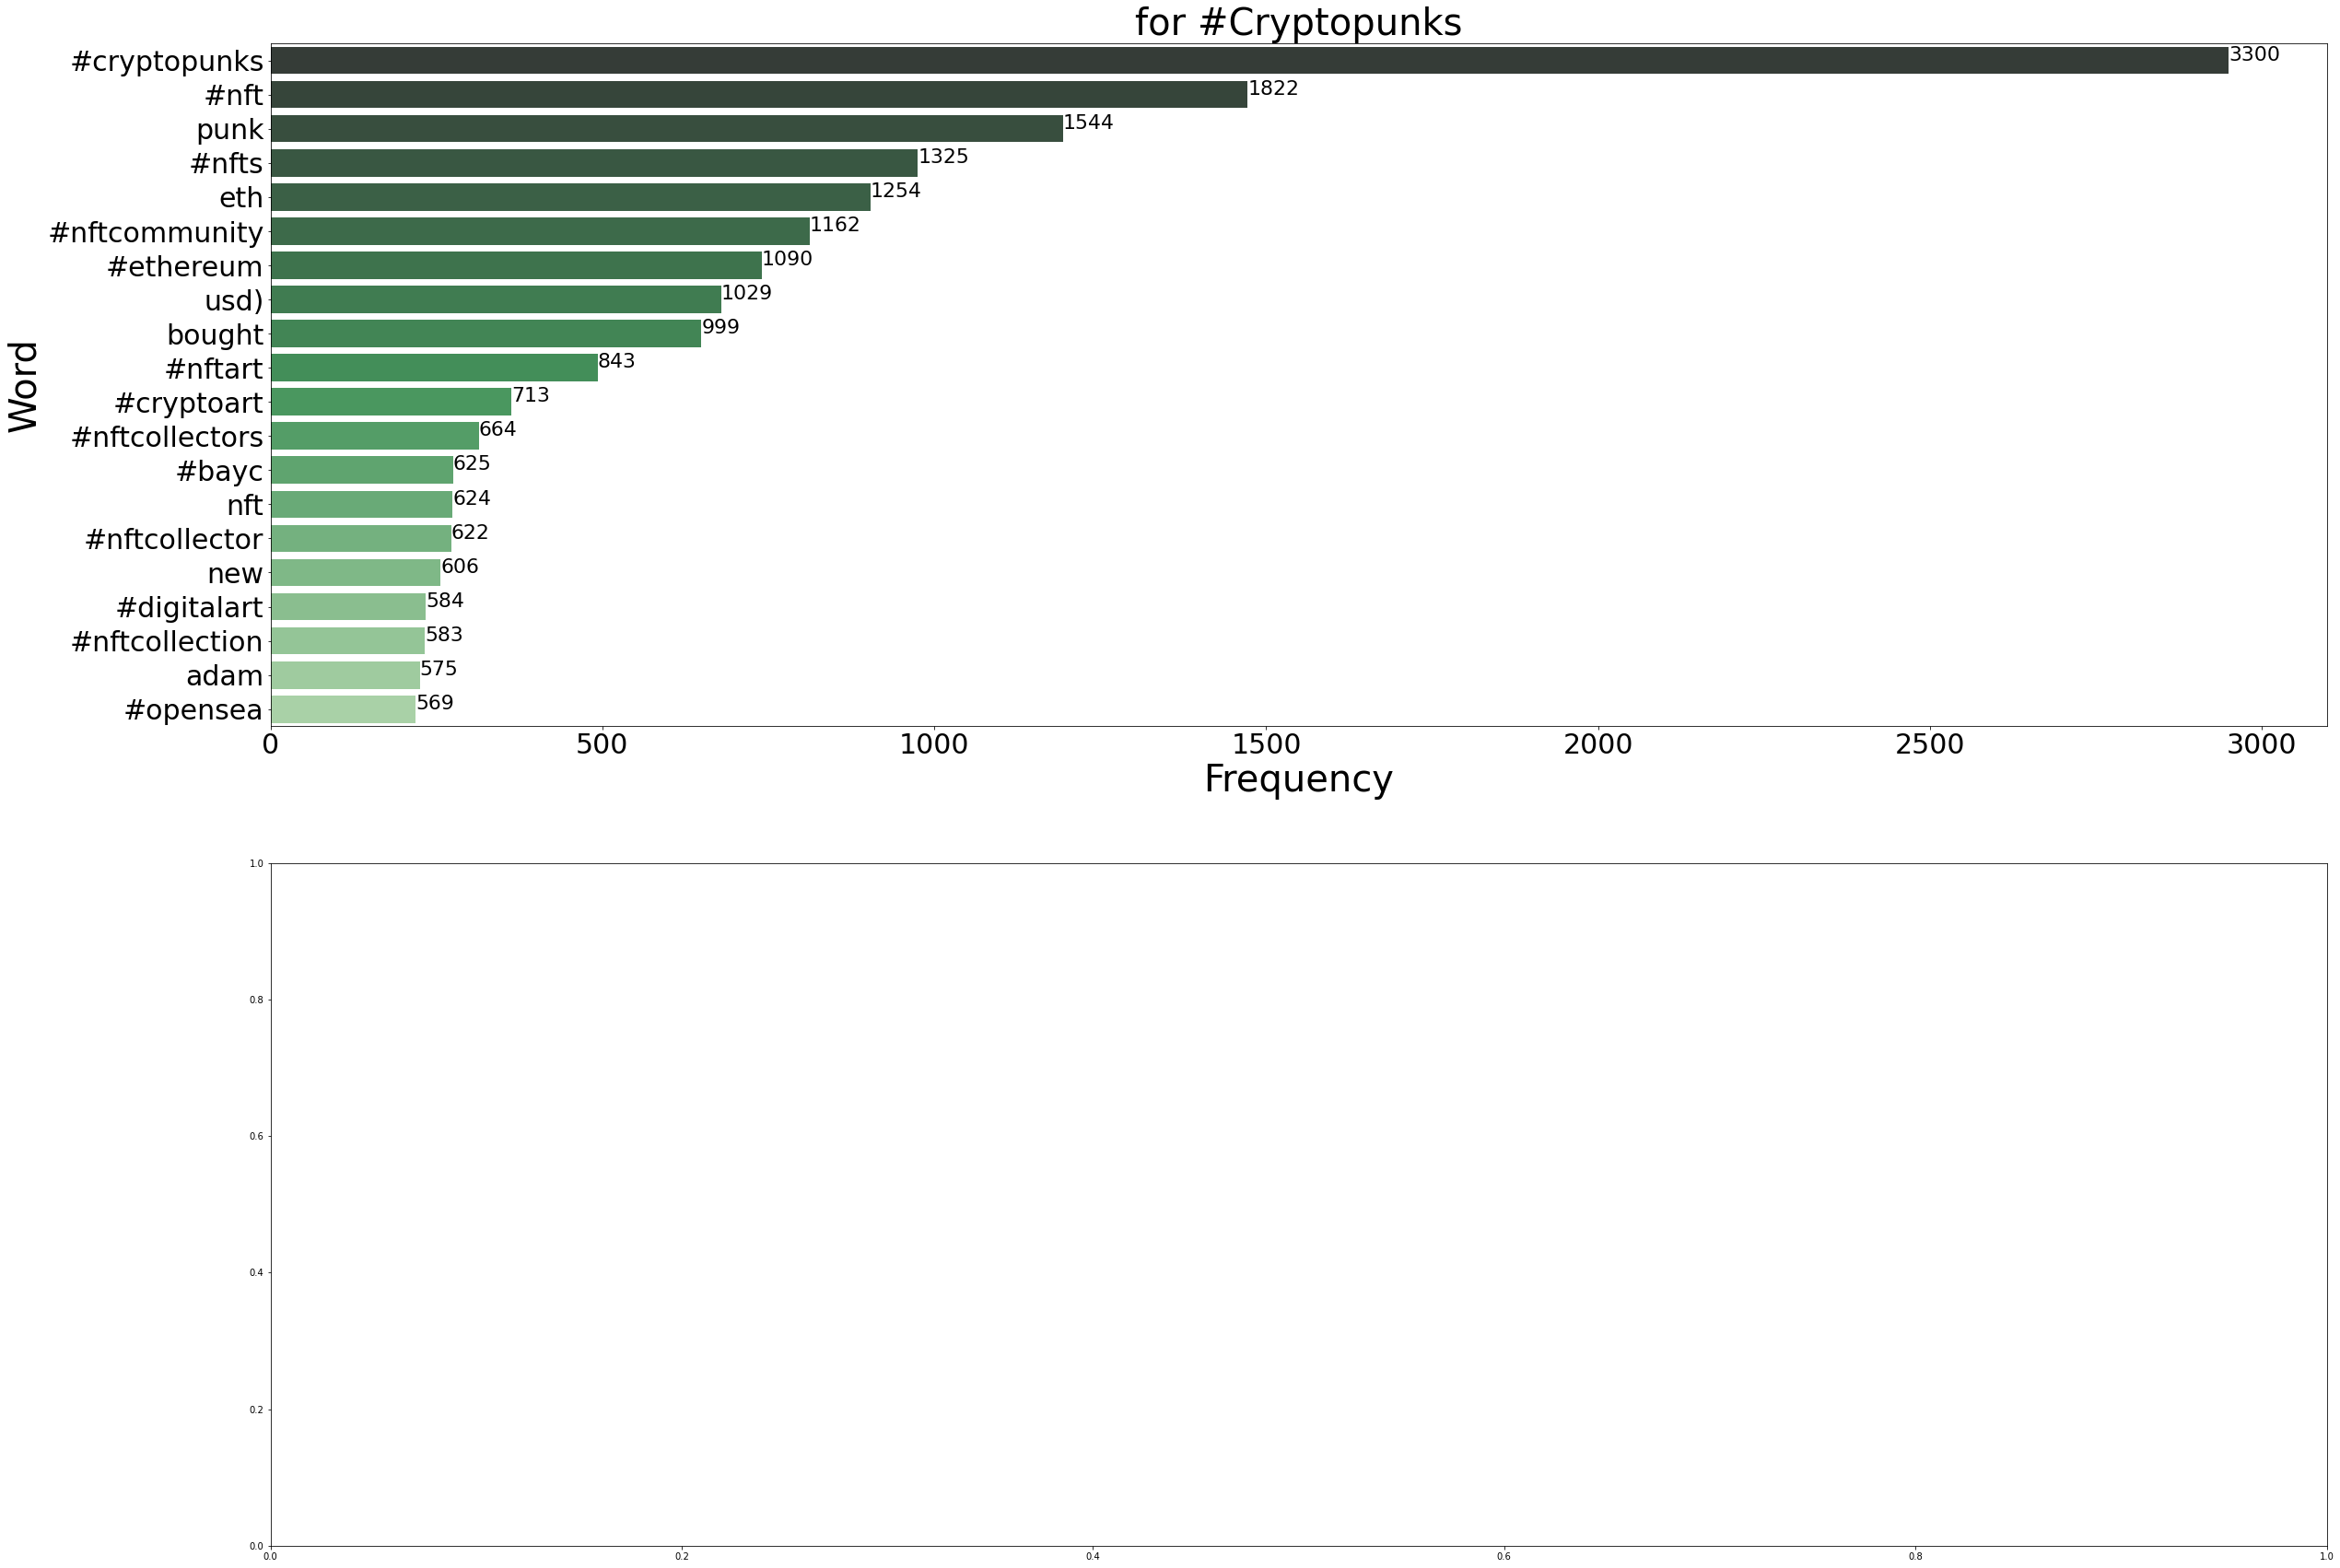

In [ ]:
fig, axs = plt.subplots(2,figsize=(40,30))
axs[0].set_title('for #Cryptopunks',fontsize=40)

pal1 = sns.color_palette("Greens_d", len(df1["Frequency"]))
rank1 = df1["Frequency"].argsort().argsort()
ax1=sns.barplot(data =df1, x = "Frequency", y = "Word", palette=np.array(pal1[::1])[rank1], ax=axs[0])

for index, row in df1.iterrows():
  ax1.text(row.Frequency,row.level_0,int(row.Frequency)+350, color='black', ha="left",fontsize=22)


ax1.tick_params(axis='both', which='major', labelsize=30)
ax1.set_xlabel("Frequency",fontsize=40)
ax1.set_ylabel("Word",fontsize=40)


plt.show()
fig.savefig("overall_rank.pdf")

#Word Cloud

In [ ]:
# Join the different processed titles together.
long_string = ','.join(list(df_cryp['paper_text_processed'].values))#.join(list(df['paper_text_processed'].values))

#nltk.download('stopwords')
stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use','https',"tco","i'm","-","de","amp","&amp;"])

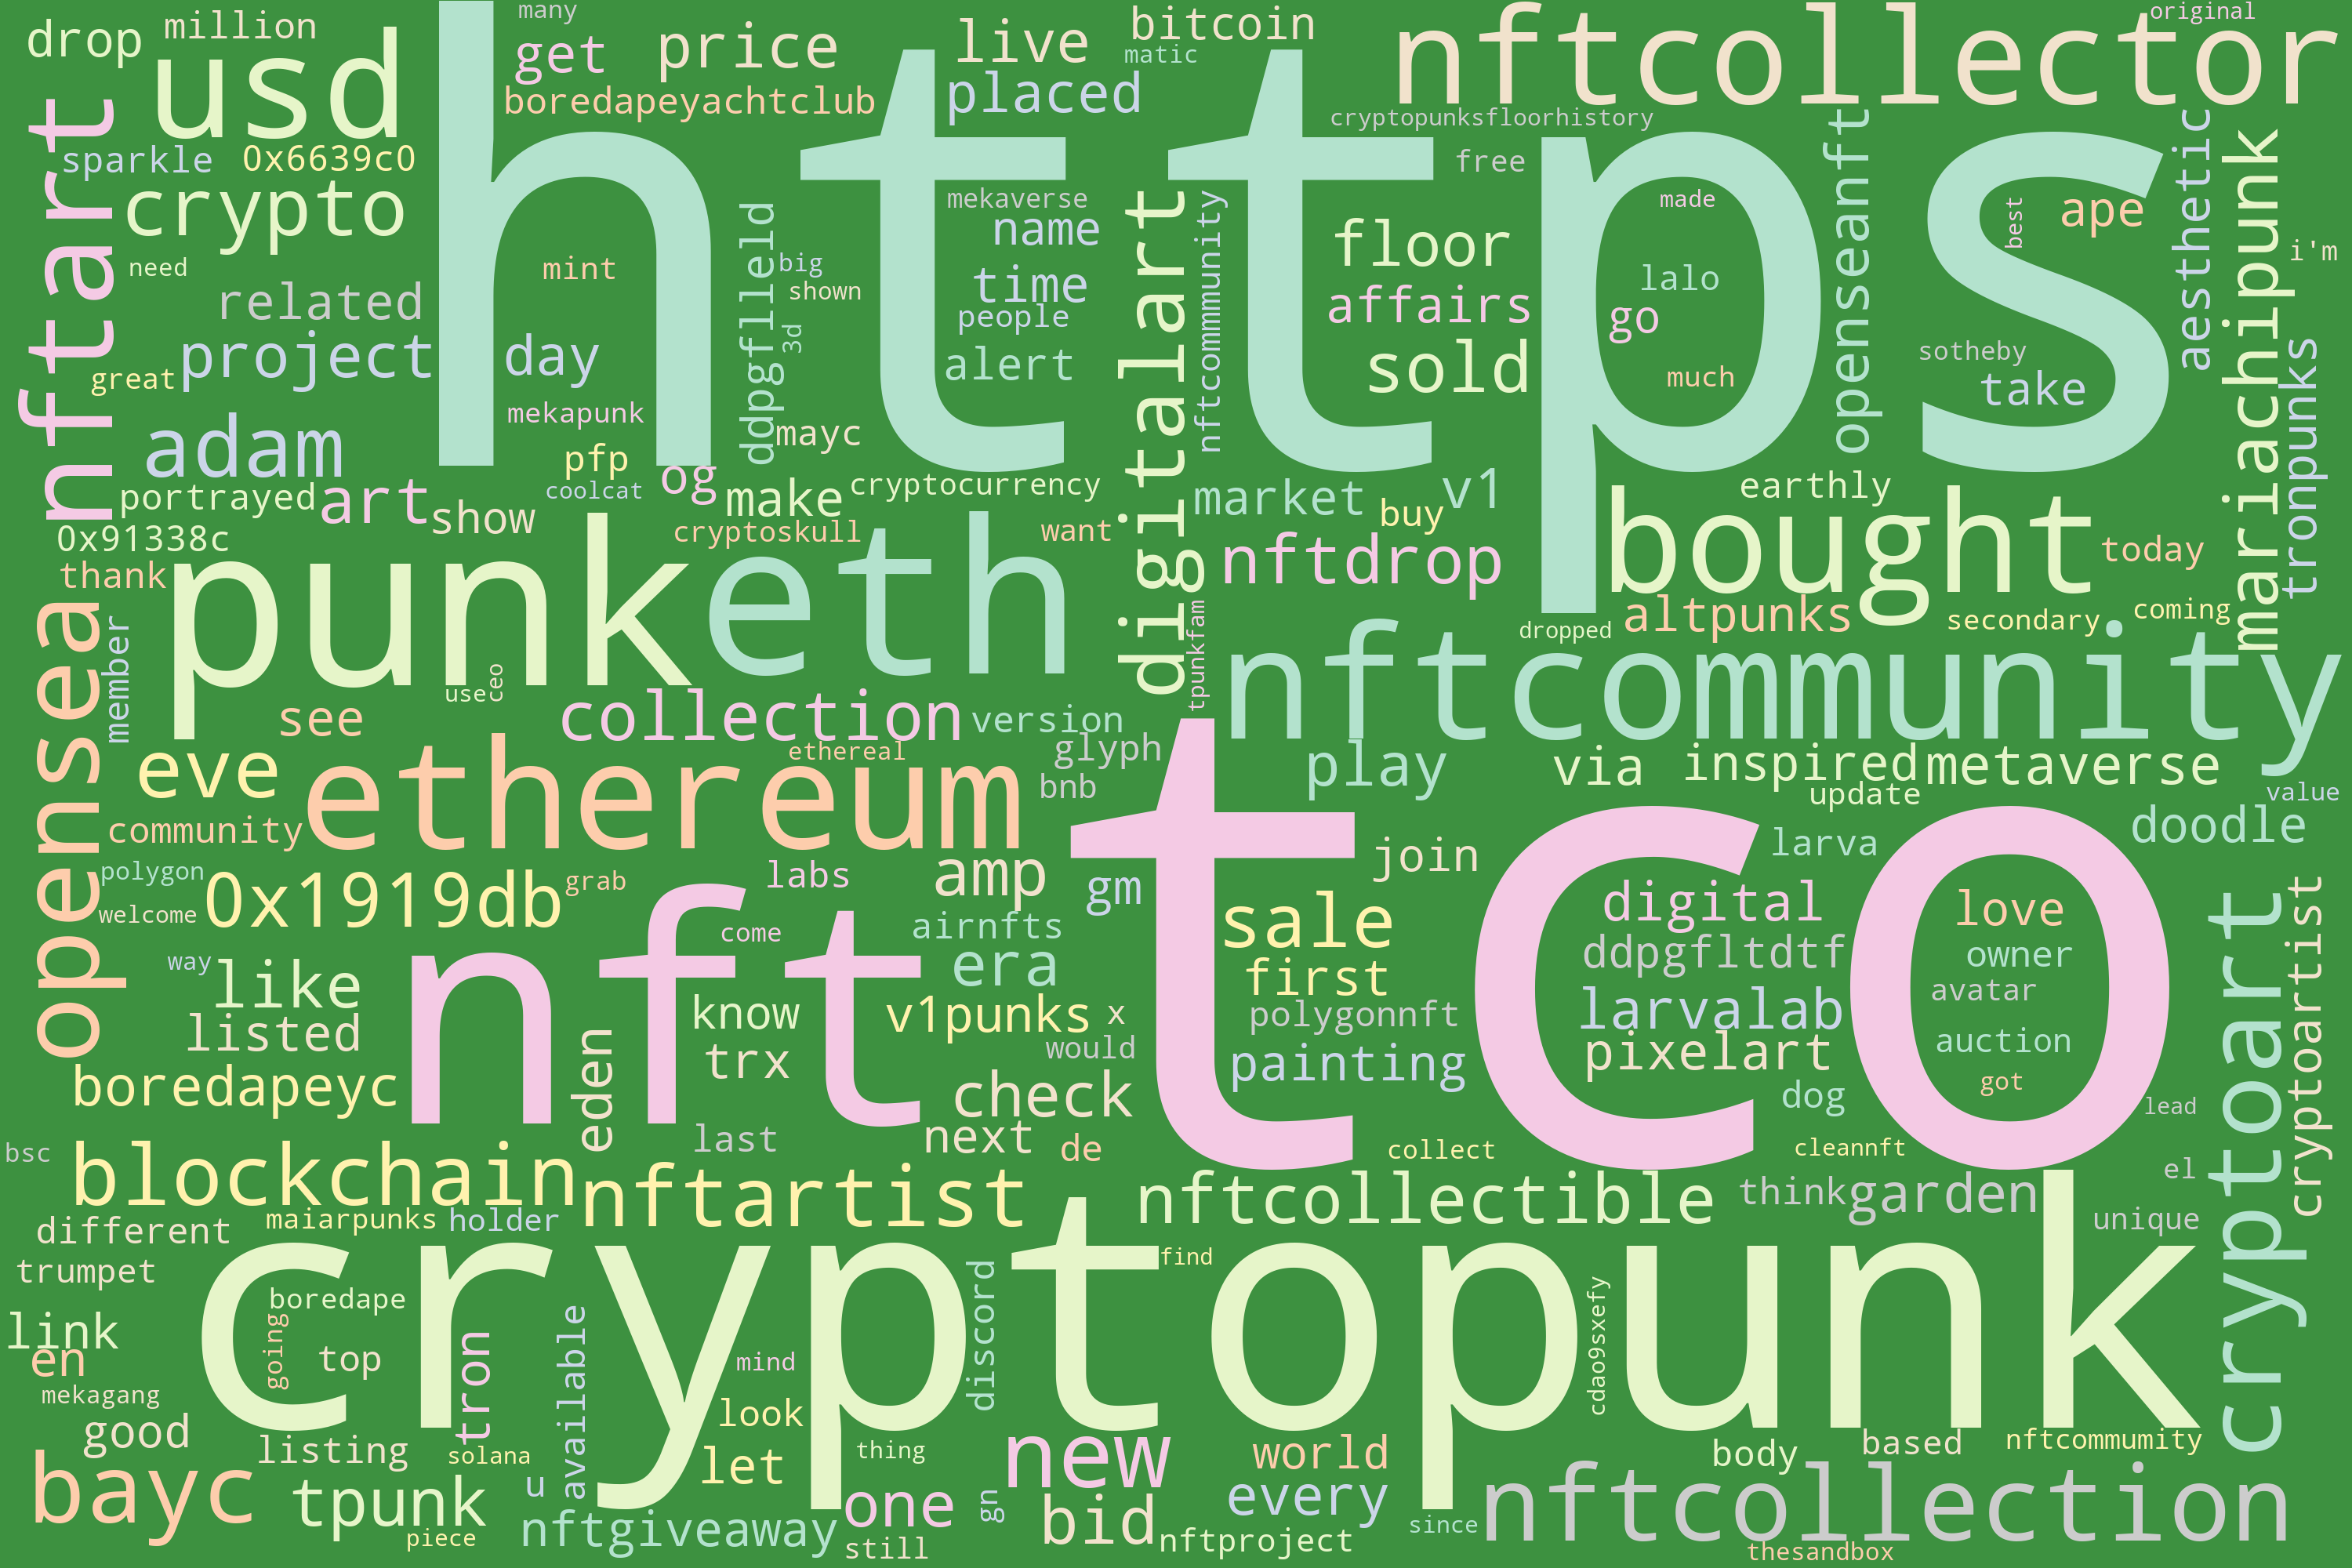

In [ ]:
#wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False).generate(long_string)
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

#LDA 

In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','https', "tco","-","de","amp","la","et","les","en","lo","un","el","que","por","es","se","los","para","ser","las","mas","una"])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = df_cryp.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['words', 'kdanye', 'vision', 'krystal', 'klear', 'kda', 'god', 'blessed', 'us', 'kadonda', 'kadena', 'cryptopunks', 'get', 'uhhhhhhhh', 'drop', 'us', 'uhhhhhh', 'discord', 'sers', 'nwpj', 'erdmh', 'lfuwi', 'jsm']


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1)]


##topic=1

In [ ]:
def lda(corpus,id2word,num_topics):
  lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=num_topics, random_state=100)
  # Print the Keyword 
  pprint(lda_model.print_topics())
  doc_lda = lda_model[corpus]
  
  # Compute Coherence Score
  coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  print('\nCoherence Score: ', coherence_lda)

  return doc_lda

In [ ]:
lda(corpus, id2word, 1)

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.054*"cryptopunks" + 0.031*"nft" + 0.020*"eth" + 0.019*"nfts" + '
  '0.019*"punk" + 0.014*"nftcommunity" + 0.013*"ethereum" + 0.012*"usd" + '
  '0.011*"bought" + 0.009*"nftart"')]


/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in


Coherence Score:  0.2629228089754487


##topic=5

In [ ]:
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=0)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.070*"cryptopunks" + 0.047*"eth" + 0.043*"punk" + 0.042*"ethereum" + '
  '0.041*"usd" + 0.036*"bought" + 0.016*"nft" + 0.011*"db" + 0.009*"new" + '
  '0.008*"bid"'),
 (1,
  '0.046*"cryptopunks" + 0.027*"eth" + 0.026*"nft" + 0.015*"punk" + '
  '0.013*"opensea" + 0.013*"nftcommunity" + 0.012*"nftart" + 0.010*"ethereum" '
  '+ 0.010*"usd" + 0.009*"bought"'),
 (2,
  '0.039*"cryptopunks" + 0.027*"nft" + 0.022*"nfts" + 0.021*"adam" + '
  '0.015*"eve" + 0.014*"era" + 0.012*"cryptoart" + 0.011*"punk" + '
  '0.011*"nftcommunity" + 0.011*"digitalart"'),
 (3,
  '0.047*"cryptopunks" + 0.044*"nft" + 0.027*"nftcommunity" + 0.025*"nfts" + '
  '0.017*"punk" + 0.012*"nftart" + 0.012*"cryptoart" + 0.012*"blockchain" + '
  '0.010*"nftcollectors" + 0.009*"nftartist"'),
 (4,
  '0.058*"cryptopunks" + 0.038*"nft" + 0.030*"nfts" + 0.016*"nftcommunity" + '
  '0.015*"eth" + 0.012*"opensea" + 0.009*"nftart" + 0.008*"cryptopunk" + '
  '0.008*"bayc" + 0.008*"punk"')]


/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4259634440345924


In [ ]:
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.031853 -0.068433       1        1  30.842404
0     -0.156584  0.029549       2        1  22.123971
3      0.064580 -0.019746       3        1  21.542719
1     -0.034200 -0.019838       4        1  13.027081
2      0.094351  0.078468       5        1  12.463825, topic_info=              Term        Freq       Total Category  logprob  loglift
140            usd  568.000000  568.000000  Default  30.0000  30.0000
124       ethereum  619.000000  619.000000  Default  29.0000  29.0000
136         bought  533.000000  533.000000  Default  28.0000  28.0000
108            eth  959.000000  959.000000  Default  27.0000  27.0000
355           adam  171.000000  171.000000  Default  26.0000  26.0000
..             ...         ...         ...      ...      ...      ...
36         opensea   36.269698  334.261195   Topic5  -5.0850  -0.1386
564  nftcollection   29.416509  193.500958   Topic5  -5.2944   0.1986
180           bayc   30.863843  247.909145   Topic5  -5.2464  -0.0011
153          punks   28.248543  241.345443   Topic5  -5.3349  -0.0628
32    nftcollector   25.437153  220.085947   Topic5  -5.4397  -0.0755

[368 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1748      2  0.913321        ac
1748      4  0.076110        ac
2664      5  0.890630  academic
355       1  0.029133      adam
355       3  0.256369      adam
...     ...       ...       ...
542       1  0.136355   ybkgksm
542       4  0.545420   ybkgksm
542       5  0.272710   ybkgksm
623       4  0.685648      ypse
9246      4  0.827501     ソンヒマン

[743 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 4, 2, 3])

##topic=10

In [ ]:
from pprint import pprint

# number of topics
num_topics =10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=0)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.067*"cryptopunks" + 0.046*"eth" + 0.043*"punk" + 0.043*"ethereum" + '
  '0.042*"usd" + 0.040*"bought" + 0.016*"nft" + 0.013*"db" + 0.007*"new" + '
  '0.007*"xf"'),
 (1,
  '0.045*"cryptopunks" + 0.029*"eth" + 0.022*"nft" + 0.015*"punk" + '
  '0.012*"ethereum" + 0.012*"bought" + 0.012*"usd" + 0.010*"opensea" + '
  '0.009*"nftcommunity" + 0.009*"db"'),
 (2,
  '0.039*"adam" + 0.034*"cryptopunks" + 0.028*"nft" + 0.025*"era" + '
  '0.024*"nfts" + 0.017*"eve" + 0.016*"punk" + 0.016*"cryptoart" + '
  '0.015*"digitalart" + 0.015*"blockchain"'),
 (3,
  '0.047*"nft" + 0.046*"cryptopunks" + 0.027*"nftcommunity" + 0.024*"nfts" + '
  '0.016*"punk" + 0.013*"blockchain" + 0.012*"cryptoart" + 0.011*"nftart" + '
  '0.009*"nftartist" + 0.009*"nftcollectors"'),
 (4,
  '0.053*"cryptopunks" + 0.036*"nft" + 0.028*"nfts" + 0.017*"eth" + '
  '0.013*"nftcommunity" + 0.010*"bayc" + 0.010*"cryptopunk" + 0.010*"opensea" '
  '+ 0.009*"punk" + 0.007*"sale"'),
 (5,
  '0.056*"cryptopunks" + 0.028*"eth" + 0.0

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [ ]:
# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.34320009974355953


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [ ]:
lda_viz


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.018815  0.000362       1        1  20.817771
0      0.153621 -0.086267       2        1  12.338527
4     -0.007848  0.090559       3        1  11.945724
9     -0.057860 -0.009264       4        1  11.458373
3     -0.080160  0.025377       5        1  11.335278
5      0.085397 -0.014271       6        1   9.050388
8      0.023721  0.048621       7        1   8.235745
2     -0.148452 -0.102963       8        1   6.497215
1      0.051127  0.005463       9        1   4.753623
6     -0.000732  0.042382      10        1   3.567356, topic_info=          Term        Freq       Total Category  logprob  loglift
355       adam  187.000000  187.000000  Default  30.0000  30.0000
140        usd  590.000000  590.000000  Default  29.0000  29.0000
108        eth  967.000000  967.000000  Default  28.0000  28.0000
124   ethereum  639.000000  639.000000  Default  27.0000  27.0000
136     bought  556.000000  556.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
19          us    3.352457   36.460147  Topic10  -6.2152   0.9468
273        art    3.887595  109.572435  Topic10  -6.0671  -0.0054
128  nftartist    4.049862  152.891834  Topic10  -6.0263  -0.2977
140        usd    4.365475  590.481830  Topic10  -5.9512  -1.5739
464         db    3.719913  170.152337  Topic10  -6.1112  -0.4896

[776 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
603       5  0.715931         aape
1748      1  0.070982           ac
1748      2  0.425891           ac
1748      3  0.070982           ac
1748      4  0.141964           ac
...     ...       ...          ...
972       1  0.781056        zzzyq
8402      2  0.695561   エイリアンか最も高価
3709     10  0.491478         コルク半
8403      2  0.695561  ヒクセルのトットアート
7636     10  0.491477           万円

[1780 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 1, 5, 10, 4, 6, 9, 3, 2, 7])

##topic=15

In [ ]:
from pprint import pprint

# number of topics
num_topics =15
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=100)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.057*"cryptopunks" + 0.030*"eth" + 0.025*"nft" + 0.021*"punk" + '
  '0.017*"usd" + 0.015*"bought" + 0.014*"ethereum" + 0.014*"nfts" + '
  '0.010*"punks" + 0.008*"sold"'),
 (1,
  '0.037*"cryptopunks" + 0.027*"nft" + 0.014*"cryptopunk" + 0.011*"nfts" + '
  '0.010*"eth" + 0.010*"nftcommunity" + 0.007*"sold" + 0.007*"collection" + '
  '0.007*"opensea" + 0.006*"punks"'),
 (2,
  '0.057*"cryptopunks" + 0.048*"nft" + 0.024*"nftcommunity" + 0.024*"nfts" + '
  '0.011*"opensea" + 0.011*"eth" + 0.010*"nftcollector" + 0.008*"bayc" + '
  '0.008*"nftart" + 0.007*"cryptoart"'),
 (3,
  '0.051*"cryptopunks" + 0.034*"nft" + 0.031*"punk" + 0.022*"nfts" + '
  '0.021*"eth" + 0.017*"ethereum" + 0.017*"nftcommunity" + 0.016*"usd" + '
  '0.015*"nftart" + 0.013*"cryptoart"'),
 (4,
  '0.037*"cryptopunks" + 0.023*"nfts" + 0.021*"nft" + 0.008*"nftcommunity" + '
  '0.007*"punk" + 0.007*"crypto" + 0.006*"nftart" + 0.006*"nftcollection" + '
  '0.006*"blockchain" + 0.006*"larvalabs"'),
 (5,
  '0.048*"cryptopu

In [ ]:
# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.32622229696815


In [ ]:
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.086409  0.092539       1        1  13.653434
2      0.081921 -0.093030       2        1  12.250469
14     0.029866  0.039551       3        1  10.661927
10    -0.018951  0.116903       4        1   8.636772
5      0.087268  0.005427       5        1   8.417549
13     0.064977 -0.076392       6        1   8.153252
3      0.052488  0.043120       7        1   7.932426
11     0.020550 -0.033950       8        1   6.834394
0     -0.030212  0.042265       9        1   5.399453
6      0.004738 -0.012226      10        1   5.135110
9     -0.046118 -0.023529      11        1   2.979136
1     -0.057746 -0.069170      12        1   2.685183
7     -0.087302  0.040206      13        1   2.619270
4     -0.061499 -0.088068      14        1   2.489339
8     -0.126388  0.016355      15        1   2.152284, topic_info=             Term         Freq        Total Category  logprob  loglift
140           usd   567.000000   567.000000  Default  30.0000  30.0000
136        bought   530.000000   530.000000  Default  29.0000  29.0000
1     cryptopunks  2547.000000  2547.000000  Default  28.0000  28.0000
62           punk   886.000000   886.000000  Default  27.0000  27.0000
124      ethereum   618.000000   618.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
1480           xb     2.109081    39.345841  Topic15  -6.1734   0.9125
503        listed     2.110762    53.293946  Topic15  -6.1726   0.6099
46           sale     2.304808   115.219577  Topic15  -6.0846  -0.0732
101           day     2.107452    59.732088  Topic15  -6.1742   0.4943
342           bid     2.111298   114.126134  Topic15  -6.1723  -0.1514

[1182 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
3777      2  0.253455          aaa
3777      8  0.506910          aaa
603      13  0.478026         aape
1011      1  0.349866           ab
1011      4  0.583109           ab
...     ...       ...          ...
3709      9  0.882266         コルク半
9246      9  0.800537        ソンヒマン
8403      3  0.845190  ヒクセルのトットアート
3711      9  0.655053         富士日章
3712      9  0.655053           白赤

[2943 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 3, 15, 11, 6, 14, 4, 12, 1, 7, 10, 2, 8, 5, 9])

##topic=20

In [ ]:
from pprint import pprint

# number of topics
num_topics =20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=100)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

**sah topic sample**

In [ ]:
DF=df_sah
topic1=["hate","people","stop","us","racism","asians","crimes","community","stopaapihate","anti","one","black","please", "help", "support", "racist", "violence", "time", "aapi","want", "thank","speak","human"]
topic2=["stand","together","anti","americans","discrimination","racial", "must","crimes","us","condemn","american","support","communities","today", "solidarity", "covid", "action", "respected", "pandemic", "friends","city"]
topic3=["stopasianracism", "blm","one","black", "never","everyone","love", "feel","part","need","proud","chinese","hope" ]
topic4=["stopasianhate","con","todos","todos","como","racismo","bts","respeto","esta","xenofobia","personas","cuando","pero","asiaticos"]
topic5= ["asian","hate","pm","american","support","justice","great","story","back","march","join","art"]
topic6=["pessoas","abaixo","maximo","colem","possiveis","attacker","pledge"]
topic7=["year","old","woman","man","crimes","video","stories","country"]
topic8=["american","pacific","islander","national","ny","event","powerful","action","rally","virtual","senate"]
topic9=["white","apology","supremacy","americans","act","work","law","efforts","new","fight","radio","physicians","demand"]
topic10=["sisters","brothers","watch","register"]
topic11=["east","attack","right","capac","speaking"]
topic12=["beautiful","attacked","like","world","even","respect","better","day","nft","bill","potus","vote","sad","bts_twt","end"]
topic13=["voice","give","spread","awareness","tweet","share","happy","twitter","raise","platform","podcast","donate","speak","educate"]
topic14=["kim","against"]
topic15=["nyc","yorkers","new","joining","street","service","rihanna","asianamerican","china","building","staff","sunday"]
topic16=["mega","lgbtq","fundraiser","endracism","gofundme","lied","raising","retweeted","wishing","cats"]
topic17=["lee","ateez","board","chicago","asiansarehuman","lgbtqia","coalition","die","california"]
topic18=["park","atlanta","aafederation","killed","victims","tan","shootings","spa","paul","korean",'released',"xiaojie","feng","daoyou","oakland","released","shot"]
topic19=["bystander","training","asia","yang","intervention","btsarmy","ihollaback","instagram","voting","metoo",'mds',"yg","gt"]
topic20=["got","nypdhatecrimes","square","excited","antiracism","fans","che","official","shout","vincentchin",'shout',"muchas"]

topics=[topic1, topic2,topic3,topic4,topic5,topic6,topic7,topic8, topic9, topic10, topic11, topic12,topic13, topic14,topic15,topic16,topic17,topic18, topic19,topic20]

e=[]
for j in range(len(topics)):
  words=topics[j]
  d=[]
  for i in range (len(words)):
    a = pd.DataFrame(index=np.arange(5))
    a["Word"]=words[i]
    b=DF[DF.Tweets.notnull()][DF.Tweets.dropna().str.contains(words[i])].sample(n=5,replace=True).reset_index().drop(["index"], axis=1)
    c=pd.concat([a,b],axis=1)
    d.append(c)
  appended_data = pd.concat(d).reset_index().drop(["index"], axis=1)
  e.append(appended_data)
final= pd.concat(e)

In [ ]:
final.to_csv("blm_20_sample_tweets.csv")

##Topic=25

In [ ]:
from pprint import pprint

# number of topics
num_topics =25
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=100)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

##Topic=30

In [ ]:
from pprint import pprint

# number of topics
num_topics =30
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=100)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

##Topic=35

In [ ]:
from pprint import pprint

# number of topics
num_topics =35
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=100)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

##Topic=40

In [ ]:
from pprint import pprint

# number of topics
num_topics =40
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=100)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

##Coherence Graph

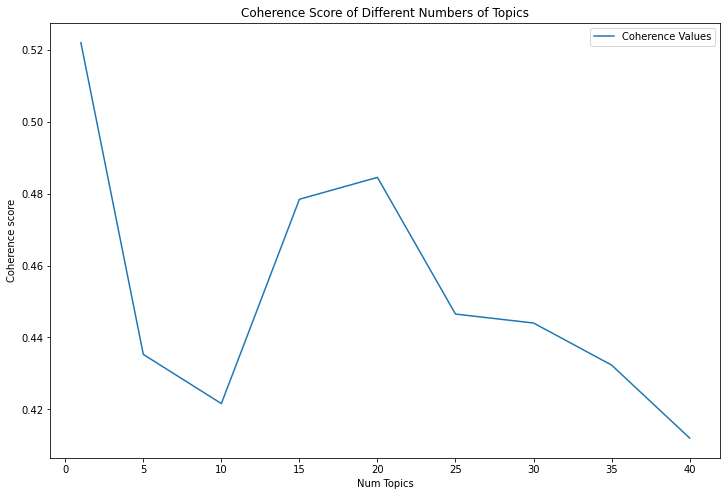

In [ ]:
x=[1,5,10,15,20,25,30,35,40]
coherence_values=[ 0.5220695862935927,0.43527452633708047,0.42158196900864836,0.4784741781296445,0.484565379511168
,  0.44650946602739805, 0.4440136991286358,0.4323130004959125,0.41199035852715127]

plt.figure(figsize=(12,8))
plt.plot(x, coherence_values, label="Coherence Values")
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend()
plt.title("Coherence Score of Different Numbers of Topics")
plt.show()

##Determine Parameters alpha and beta

###alpha=0.01,beta=0.91

In [ ]:
# number of topics
num_topics =20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=100, alpha=0.01,eta=0.91)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.014*"cryptopunks" + 0.007*"eth" + 0.006*"nft" + 0.004*"punk" + '
  '0.003*"usd" + 0.003*"nfts" + 0.003*"punks" + 0.003*"ethereum" + '
  '0.003*"bought" + 0.002*"bayc"'),
 (1,
  '0.004*"cryptopunks" + 0.003*"nft" + 0.002*"punks" + 0.001*"nfts" + '
  '0.001*"cryptopunk" + 0.001*"eth" + 0.001*"nftcommunity" + 0.001*"opensea" + '
  '0.001*"sold" + 0.001*"collection"'),
 (2,
  '0.016*"cryptopunks" + 0.013*"nft" + 0.006*"nftcommunity" + 0.006*"nfts" + '
  '0.003*"eth" + 0.003*"opensea" + 0.003*"nftcollector" + 0.003*"bayc" + '
  '0.002*"cryptopunk" + 0.001*"nftart"'),
 (3,
  '0.011*"cryptopunks" + 0.007*"nft" + 0.006*"punk" + 0.006*"eth" + '
  '0.005*"ethereum" + 0.004*"usd" + 0.004*"nfts" + 0.003*"bought" + '
  '0.003*"nftcommunity" + 0.003*"nftart"'),
 (4,
  '0.005*"cryptopunks" + 0.003*"nfts" + 0.002*"nft" + 0.002*"crypto" + '
  '0.001*"art" + 0.001*"nftcommunity" + 0.001*"nftart" + 0.001*"larvalabs" + '
  '0.001*"cryptopunk" + 0.001*"punk"'),
 (5,
  '0.012*"cryptopunks" + 0.010

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [ ]:
# Compute Coherence Score

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3162284940811791


In [ ]:
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
19    -0.051196 -0.000127       1        1  22.860052
12    -0.017423  0.016818       2        1  11.276313
10     0.000207  0.019211       3        1   9.045977
14    -0.009455  0.009946       4        1   7.841290
2     -0.002777 -0.000580       5        1   7.365308
15    -0.020615 -0.027279       6        1   7.364672
17    -0.001447  0.011089       7        1   4.962418
16    -0.001756 -0.000703       8        1   4.818142
11     0.002070  0.000362       9        1   4.093157
5     -0.002996 -0.008785      10        1   3.681358
0      0.003904  0.006278      11        1   3.007797
3     -0.003595  0.003151      12        1   2.676563
6      0.007388  0.000175      13        1   2.276115
13     0.003796 -0.004910      14        1   2.115440
18    -0.006576 -0.010562      15        1   2.043337
7      0.020119  0.002285      16        1   1.107824
4      0.021118 -0.007263      17        1   1.030829
1      0.019832 -0.004349      18        1   1.008485
9      0.015741 -0.005215      19        1   0.860673
8      0.023662  0.000458      20        1   0.564250, topic_info=             Term        Freq       Total Category  logprob  loglift
1     cryptopunks  794.000000  794.000000  Default  30.0000  30.0000
355          adam   69.000000   69.000000  Default  29.0000  29.0000
30            nft  498.000000  498.000000  Default  28.0000  28.0000
140           usd  194.000000  194.000000  Default  27.0000  27.0000
136        bought  184.000000  184.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
23     collection    0.077879   34.688696  Topic20  -8.1335  -0.9216
182    cryptopunk    0.076926   81.694818  Topic20  -8.1458  -1.7905
1838       owners    0.075537   10.806644  Topic20  -8.1640   0.2141
487          free    0.074975   12.357807  Topic20  -8.1715   0.0725
1753           xd    0.074975   13.107876  Topic20  -8.1715   0.0136

[1283 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
4331      1  0.341662      aa
4331      3  0.170831      aa
1011      1  0.145372      ab
1011      2  0.290744      ab
1011      3  0.145372      ab
...     ...       ...     ...
5535      7  0.273322  только
3706      1  0.289999     なんと
3709      1  0.290004    コルク半
9246      1  0.281799   ソンヒマン
7636      1  0.284716      万円

[2804 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[20, 13, 11, 15, 3, 16, 18, 17, 12, 6, 1, 4, 7, 14, 19, 8, 5, 2, 10, 9])

###a=0.31, b=0.91

In [ ]:

# number of topics
num_topics =20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=100, alpha=0.31,eta=0.9)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.013*"cryptopunks" + 0.007*"eth" + 0.005*"nft" + 0.004*"punk" + '
  '0.004*"usd" + 0.003*"punks" + 0.003*"bought" + 0.003*"nfts" + 0.002*"sold" '
  '+ 0.002*"ethereum"'),
 (1,
  '0.004*"cryptopunks" + 0.003*"nft" + 0.002*"cryptopunk" + 0.001*"punks" + '
  '0.001*"eth" + 0.001*"collection" + 0.001*"nfts" + 0.001*"sold" + '
  '0.001*"bayc" + 0.001*"bought"'),
 (2,
  '0.018*"cryptopunks" + 0.015*"nft" + 0.007*"nftcommunity" + 0.006*"nfts" + '
  '0.003*"nftcollector" + 0.003*"opensea" + 0.003*"eth" + 0.003*"bayc" + '
  '0.002*"pixelart" + 0.002*"art"'),
 (3,
  '0.009*"cryptopunks" + 0.006*"nft" + 0.005*"punk" + 0.004*"eth" + '
  '0.003*"ethereum" + 0.003*"usd" + 0.003*"nfts" + 0.002*"nftart" + '
  '0.002*"bought" + 0.002*"nftcommunity"'),
 (4,
  '0.004*"cryptopunks" + 0.002*"nfts" + 0.002*"nft" + 0.001*"crypto" + '
  '0.001*"larvalabs" + 0.001*"punk" + 0.001*"cryptopunk" + 0.001*"art" + '
  '0.001*"eth" + 0.001*"punks"'),
 (5,
  '0.010*"cryptopunks" + 0.010*"nft" + 0.004*"nfts" + 

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [ ]:
# Compute Coherence Score

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.31134422332924705


In [ ]:
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
19    -0.066043 -0.005720       1        1  20.543973
12    -0.020460  0.029923       2        1  10.510731
2     -0.006464 -0.005090       3        1   8.068448
14    -0.009087  0.009651       4        1   7.410468
15    -0.019537 -0.027982       5        1   6.875802
10     0.002795  0.025870       6        1   6.391015
16    -0.001343 -0.001407       7        1   4.637901
11     0.005055 -0.001446       8        1   4.484900
17    -0.001010  0.006062       9        1   4.457736
5      0.002438 -0.007661      10        1   3.536337
0      0.005376  0.006268      11        1   3.168382
18     0.000110 -0.007135      12        1   3.014841
3     -0.000554  0.001420      13        1   2.834621
6      0.006461 -0.001051      14        1   2.610970
13     0.002268 -0.006392      15        1   2.364829
1      0.020199 -0.003988      16        1   2.052774
7      0.017758  0.001087      17        1   1.848053
4      0.021146 -0.006178      18        1   1.843702
9      0.017419 -0.004591      19        1   1.752374
8      0.023473 -0.001640      20        1   1.592144, topic_info=             Term        Freq       Total Category  logprob  loglift
355          adam   70.000000   70.000000  Default  30.0000  30.0000
140           usd  183.000000  183.000000  Default  29.0000  29.0000
136        bought  173.000000  173.000000  Default  28.0000  28.0000
124      ethereum  193.000000  193.000000  Default  27.0000  27.0000
108           eth  323.000000  323.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
563          name    0.220103   20.158903  Topic20  -8.1319  -0.3772
237     metaverse    0.226102   27.784769  Topic20  -8.1050  -0.6712
276          like    0.225805   36.823156  Topic20  -8.1063  -0.9541
55   nftcommunity    0.248563  258.513834  Topic20  -8.0103  -2.8069
31         nftart    0.231963  166.525300  Topic20  -8.0794  -2.4362

[1240 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
4331      1  0.205460         aa
4331      6  0.205460         aa
2224      1  0.239022       able
2224      8  0.239022       able
1748      1  0.398869         ac
...     ...       ...        ...
9800      1  0.297519  zvcvjpmlg
7481      1  0.297062        zxj
7300      1  0.285152         ın
3709      1  0.283493       コルク半
9246      1  0.263993      ソンヒマン

[2524 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[20, 13, 3, 15, 16, 11, 17, 12, 18, 6, 1, 19, 4, 7, 14, 2, 8, 5, 10, 9])

###a=symmetric, b=0.91

In [ ]:
from pprint import pprint

# number of topics
num_topics =20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=100, alpha="symmetric",eta=0.91)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.013*"cryptopunks" + 0.007*"eth" + 0.005*"nft" + 0.004*"punk" + '
  '0.003*"usd" + 0.003*"nfts" + 0.003*"punks" + 0.003*"ethereum" + '
  '0.003*"bought" + 0.002*"bayc"'),
 (1,
  '0.004*"cryptopunks" + 0.002*"nft" + 0.001*"punks" + 0.001*"cryptopunk" + '
  '0.001*"nfts" + 0.001*"eth" + 0.001*"collection" + 0.001*"nftcommunity" + '
  '0.001*"bayc" + 0.001*"sold"'),
 (2,
  '0.017*"cryptopunks" + 0.013*"nft" + 0.006*"nftcommunity" + 0.006*"nfts" + '
  '0.003*"eth" + 0.003*"opensea" + 0.003*"nftcollector" + 0.003*"bayc" + '
  '0.002*"cryptopunk" + 0.001*"nftart"'),
 (3,
  '0.011*"cryptopunks" + 0.007*"nft" + 0.006*"punk" + 0.006*"eth" + '
  '0.005*"ethereum" + 0.004*"usd" + 0.004*"nfts" + 0.003*"bought" + '
  '0.003*"nftcommunity" + 0.003*"nftart"'),
 (4,
  '0.005*"cryptopunks" + 0.003*"nfts" + 0.002*"nft" + 0.002*"crypto" + '
  '0.001*"art" + 0.001*"nftcommunity" + 0.001*"larvalabs" + 0.001*"cryptopunk" '
  '+ 0.001*"nftart" + 0.001*"punk"'),
 (5,
  '0.012*"cryptopunks" + 0.010*"n

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.31481242043074575


In [ ]:
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
19    -0.054155 -0.000445       1        1  22.659636
12    -0.018910  0.017281       2        1  10.512529
10    -0.001122  0.020509       3        1   9.204137
14    -0.009806  0.009555       4        1   7.691882
15    -0.020909 -0.029023       5        1   7.409815
2     -0.002697 -0.000870       6        1   7.394395
17    -0.002506  0.011197       7        1   4.979379
16    -0.001089 -0.000375       8        1   4.829502
11     0.002387 -0.000055       9        1   4.078441
5     -0.002080 -0.008580      10        1   3.630064
0      0.004069  0.006220      11        1   2.924589
3     -0.004106  0.003052      12        1   2.731498
6      0.007908 -0.000095      13        1   2.273685
18    -0.006117 -0.011313      14        1   2.177793
13     0.004282 -0.005296      15        1   2.143564
7      0.019656  0.002824      16        1   1.255557
4      0.021450 -0.006355      17        1   1.216956
1      0.022366 -0.004190      18        1   1.131087
9      0.017252 -0.004887      19        1   1.019949
8      0.024125  0.000846      20        1   0.735542, topic_info=             Term        Freq       Total Category  logprob  loglift
1     cryptopunks  797.000000  797.000000  Default  30.0000  30.0000
355          adam   68.000000   68.000000  Default  29.0000  29.0000
140           usd  195.000000  195.000000  Default  28.0000  28.0000
136        bought  185.000000  185.000000  Default  27.0000  27.0000
62           punk  300.000000  300.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
342           bid    0.113893   34.187914  Topic20  -8.0185  -0.7920
487          free    0.099570   13.000159  Topic20  -8.1529   0.0405
1838       owners    0.098136   11.115756  Topic20  -8.1674   0.1826
563          name    0.098033   20.335289  Topic20  -8.1684  -0.4225
1067       unique    0.098033   13.609338  Topic20  -8.1684  -0.0209

[1271 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
4331      1  0.350521      aa
4331      3  0.175260      aa
1011      1  0.148066      ab
1011      2  0.296131      ab
1011      3  0.148066      ab
...     ...       ...     ...
5535      1  0.273272  только
5535      7  0.273272  только
3709      1  0.290260    コルク半
9246      1  0.277906   ソンヒマン
7636      1  0.285293      万円

[2795 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[20, 13, 11, 15, 16, 3, 18, 17, 12, 6, 1, 4, 7, 19, 14, 8, 5, 2, 10, 9])

###a=0.61, b=0.91

In [ ]:
from pprint import pprint

# number of topics
num_topics =20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=100, alpha=0.61,eta=0.91)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.013*"cryptopunks" + 0.008*"nft" + 0.007*"eth" + 0.004*"nfts" + '
  '0.004*"punk" + 0.004*"usd" + 0.003*"ethereum" + 0.003*"bought" + '
  '0.002*"nftcommunity" + 0.002*"nftart"'),
 (1,
  '0.009*"cryptopunks" + 0.007*"nft" + 0.004*"nfts" + 0.003*"bought" + '
  '0.003*"punk" + 0.003*"eth" + 0.003*"usd" + 0.003*"ethereum" + '
  '0.003*"nftcommunity" + 0.002*"nftart"'),
 (2,
  '0.016*"cryptopunks" + 0.009*"nft" + 0.005*"nfts" + 0.004*"eth" + '
  '0.004*"nftcommunity" + 0.003*"punk" + 0.003*"bought" + 0.003*"ethereum" + '
  '0.002*"nftart" + 0.002*"opensea"'),
 (3,
  '0.011*"cryptopunks" + 0.008*"nft" + 0.006*"punk" + 0.005*"eth" + '
  '0.004*"nfts" + 0.004*"ethereum" + 0.004*"usd" + 0.003*"bought" + '
  '0.003*"nftcommunity" + 0.002*"nftart"'),
 (4,
  '0.010*"cryptopunks" + 0.006*"nft" + 0.005*"nfts" + 0.003*"eth" + '
  '0.003*"punk" + 0.003*"nftcommunity" + 0.003*"usd" + 0.002*"ethereum" + '
  '0.002*"nftart" + 0.002*"bought"'),
 (5,
  '0.011*"cryptopunks" + 0.009*"nft" + 0.005*"

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [ ]:
# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.26344473125425877


In [ ]:
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
19     0.001888  0.000893       1        1  10.097738
15     0.001645 -0.001461       2        1   7.469844
12     0.000782  0.000183       3        1   5.689738
14     0.000408  0.000436       4        1   5.657158
2      0.000168  0.000758       5        1   5.577723
16     0.000311  0.000199       6        1   5.044515
17    -0.000199  0.000476       7        1   4.871103
11     0.000067 -0.000123       8        1   4.765087
0     -0.000775  0.000761       9        1   4.605727
10    -0.000248  0.000387      10        1   4.571327
5      0.000403 -0.000426      11        1   4.550864
3      0.000192 -0.000333      12        1   4.453546
18     0.000105 -0.000542      13        1   4.437597
13     0.000065  0.000066      14        1   4.360670
6     -0.000164 -0.000064      15        1   4.322175
7     -0.000675 -0.000313      16        1   3.978363
9     -0.000288 -0.000138      17        1   3.974587
1     -0.000957 -0.000014      18        1   3.965573
4     -0.001298 -0.000416      19        1   3.812826
8     -0.001429 -0.000329      20        1   3.793840, topic_info=            Term        Freq       Total Category  logprob  loglift
1    cryptopunks  619.000000  619.000000  Default  30.0000  30.0000
62          punk  217.000000  217.000000  Default  29.0000  29.0000
108          eth  239.000000  239.000000  Default  28.0000  28.0000
124     ethereum  149.000000  149.000000  Default  27.0000  27.0000
35          nfts  219.000000  219.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
153        punks    1.489547   60.779106  Topic20  -7.0880  -0.4370
362          eve    1.287351   48.027630  Topic20  -7.2339  -0.3474
25        crypto    1.193756   41.765475  Topic20  -7.3094  -0.2832
355         adam    1.198799   50.583807  Topic20  -7.3052  -0.4705
128    nftartist    1.146108   40.157038  Topic20  -7.3501  -0.2846

[1245 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1748      1  0.153656      ac
1748      2  0.153656      ac
355       1  0.098846    adam
355       2  0.197692    adam
355       3  0.059308    adam
...     ...       ...     ...
848       1  0.119417    yeos
848       2  0.119417    yeos
848       5  0.119417    yeos
1924      1  0.158467  zombie
1924      2  0.158467  zombie

[2982 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[20, 16, 13, 15, 3, 17, 18, 12, 1, 11, 6, 4, 19, 14, 7, 8, 10, 2, 5, 9])

###a=0.31, b=0.61

In [ ]:
from pprint import pprint

# number of topics
num_topics =20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=100, alpha=0.31,eta=0.61)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.017*"cryptopunks" + 0.010*"eth" + 0.007*"nft" + 0.006*"punk" + '
  '0.005*"usd" + 0.004*"punks" + 0.004*"bought" + 0.004*"nfts" + 0.003*"sold" '
  '+ 0.003*"ethereum"'),
 (1,
  '0.006*"cryptopunks" + 0.004*"nft" + 0.002*"cryptopunk" + 0.001*"punks" + '
  '0.001*"eth" + 0.001*"collection" + 0.001*"nfts" + 0.001*"sold" + '
  '0.001*"bayc" + 0.001*"bought"'),
 (2,
  '0.024*"cryptopunks" + 0.020*"nft" + 0.009*"nftcommunity" + 0.008*"nfts" + '
  '0.004*"nftcollector" + 0.004*"opensea" + 0.004*"eth" + 0.004*"bayc" + '
  '0.002*"pixelart" + 0.002*"art"'),
 (3,
  '0.012*"cryptopunks" + 0.008*"nft" + 0.007*"punk" + 0.006*"eth" + '
  '0.005*"ethereum" + 0.004*"usd" + 0.004*"nfts" + 0.003*"nftart" + '
  '0.003*"bought" + 0.002*"nftcommunity"'),
 (4,
  '0.006*"cryptopunks" + 0.003*"nfts" + 0.003*"nft" + 0.002*"crypto" + '
  '0.001*"larvalabs" + 0.001*"punk" + 0.001*"cryptopunk" + 0.001*"art" + '
  '0.001*"eth" + 0.001*"punks"'),
 (5,
  '0.014*"cryptopunks" + 0.013*"nft" + 0.006*"nfts" + 

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [ ]:
# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.31134422332924705


In [ ]:
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
19     0.085994  0.007671       1        1  18.948473
12     0.027204 -0.041441       2        1   9.899496
2      0.008339  0.008290       3        1   7.956621
14     0.012034 -0.013805       4        1   7.159164
15     0.029029  0.036719       5        1   6.956508
10    -0.003883 -0.037096       6        1   6.600907
16     0.001436  0.002433       7        1   4.835393
17     0.001008 -0.008868       8        1   4.692373
11    -0.007426  0.002483       9        1   4.613463
5     -0.003081  0.011251      10        1   3.761362
0     -0.007548 -0.008982      11        1   3.413260
18     0.000365  0.010103      12        1   3.159748
3      0.001057 -0.002577      13        1   3.147809
6     -0.008787  0.001608      14        1   2.803530
13    -0.002544  0.009304      15        1   2.533344
1     -0.026895  0.006054      16        1   2.149394
7     -0.023783 -0.001501      17        1   1.961695
4     -0.028277  0.009301      18        1   1.937747
9     -0.022889  0.006656      19        1   1.825414
8     -0.031353  0.002398      20        1   1.644299, topic_info=             Term        Freq       Total Category  logprob  loglift
355          adam   87.000000   87.000000  Default  30.0000  30.0000
140           usd  232.000000  232.000000  Default  29.0000  29.0000
136        bought  219.000000  219.000000  Default  28.0000  28.0000
124      ethereum  246.000000  246.000000  Default  27.0000  27.0000
108           eth  406.000000  406.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
419          make    0.290733   22.727139  Topic20  -7.8858  -0.2511
237     metaverse    0.303907   34.045716  Topic20  -7.8415  -0.6109
276          like    0.303467   45.501193  Topic20  -7.8429  -0.9024
55   nftcommunity    0.337256  316.419506  Topic20  -7.7373  -2.7361
31         nftart    0.312610  201.096188  Topic20  -7.8132  -2.3587

[1260 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
4331      1  0.197484      aa
4331      6  0.394969      aa
603       7  0.288267    aape
2224      9  0.235376    able
1748      1  0.366373      ac
...     ...       ...     ...
1924      5  0.132937  zombie
2537      1  0.282294   zrapy
2537      4  0.282294   zrapy
4334      6  0.276972     zrd
9246     11  0.269703   ソンヒマン

[2500 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[20, 13, 3, 15, 16, 11, 17, 18, 12, 6, 1, 19, 4, 7, 14, 2, 8, 5, 10, 9])

###a=0.01, b=0.61

In [ ]:
from pprint import pprint

# number of topics
num_topics =20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=100, alpha=0.01,eta=0.61)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.019*"cryptopunks" + 0.010*"eth" + 0.008*"nft" + 0.006*"punk" + '
  '0.005*"usd" + 0.005*"nfts" + 0.004*"punks" + 0.004*"ethereum" + '
  '0.004*"bought" + 0.003*"bayc"'),
 (1,
  '0.006*"cryptopunks" + 0.004*"nft" + 0.002*"punks" + 0.002*"nfts" + '
  '0.002*"cryptopunk" + 0.002*"eth" + 0.001*"nftcommunity" + 0.001*"opensea" + '
  '0.001*"sold" + 0.001*"collection"'),
 (2,
  '0.022*"cryptopunks" + 0.017*"nft" + 0.008*"nftcommunity" + 0.008*"nfts" + '
  '0.005*"eth" + 0.004*"opensea" + 0.004*"nftcollector" + 0.003*"bayc" + '
  '0.002*"cryptopunk" + 0.002*"nftart"'),
 (3,
  '0.016*"cryptopunks" + 0.010*"nft" + 0.009*"punk" + 0.008*"eth" + '
  '0.006*"ethereum" + 0.006*"usd" + 0.005*"nfts" + 0.005*"bought" + '
  '0.004*"nftcommunity" + 0.004*"nftart"'),
 (4,
  '0.007*"cryptopunks" + 0.005*"nfts" + 0.003*"nft" + 0.002*"crypto" + '
  '0.002*"art" + 0.001*"nftcommunity" + 0.001*"nftart" + 0.001*"larvalabs" + '
  '0.001*"cryptopunk" + 0.001*"punk"'),
 (5,
  '0.016*"cryptopunks" + 0.014

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [ ]:
# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3162284940811791


In [ ]:
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
19     0.068943  0.000882       1        1  20.783849
12     0.024338 -0.024886       2        1  10.220775
10    -0.000204 -0.029370       3        1   8.337126
14     0.013364 -0.014767       4        1   7.623081
15     0.031088  0.036847       5        1   7.543467
2      0.003564  0.002703       6        1   7.317143
17     0.001563 -0.016666       7        1   5.485074
16     0.002519  0.001577       8        1   5.014181
11    -0.003268 -0.000119       9        1   4.234888
5      0.005031  0.012817      10        1   3.867843
3      0.005313 -0.005363      11        1   3.461373
0     -0.005645 -0.009580      12        1   3.421072
6     -0.010751 -0.000062      13        1   2.570579
13    -0.005217  0.007901      14        1   2.447883
18     0.010301  0.015128      15        1   2.320469
7     -0.028641 -0.003260      16        1   1.338449
1     -0.027602  0.007088      17        1   1.129303
4     -0.029639  0.011598      18        1   1.118933
9     -0.021760  0.008168      19        1   1.056340
8     -0.033296 -0.000637      20        1   0.708172, topic_info=             Term         Freq        Total Category  logprob  loglift
1     cryptopunks  1020.000000  1020.000000  Default  30.0000  30.0000
355          adam    88.000000    88.000000  Default  29.0000  29.0000
140           usd   245.000000   245.000000  Default  28.0000  28.0000
136        bought   231.000000   231.000000  Default  27.0000  27.0000
362           eve    85.000000    85.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
23     collection     0.127624    43.721195  Topic20  -7.8667  -0.8863
182    cryptopunk     0.125889   102.014345  Topic20  -7.8804  -1.7472
1838       owners     0.123363    13.085149  Topic20  -7.9007   0.2861
487          free     0.122339    15.008520  Topic20  -7.9090   0.1407
503        listed     0.122339    21.823205  Topic20  -7.9090  -0.2337

[1314 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
4331      1  0.330829      aa
4331      3  0.330829      aa
1011      1  0.137935      ab
1011      2  0.275871      ab
1011      3  0.275871      ab
...     ...       ...     ...
1924      5  0.128296  zombie
1950      2  0.191624      zu
1950      3  0.383247      zu
5523      7  0.283944      на
5535      7  0.284359  только

[2660 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[20, 13, 11, 15, 16, 3, 18, 17, 12, 6, 4, 1, 7, 14, 19, 8, 2, 5, 10, 9])

###a="symmetric", b=0.61

In [ ]:
from pprint import pprint

# number of topics
num_topics =20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=100, alpha="symmetric",eta=0.61)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.018*"cryptopunks" + 0.010*"eth" + 0.007*"nft" + 0.006*"punk" + '
  '0.005*"usd" + 0.004*"nfts" + 0.004*"punks" + 0.004*"ethereum" + '
  '0.004*"bought" + 0.003*"bayc"'),
 (1,
  '0.005*"cryptopunks" + 0.003*"nft" + 0.002*"punks" + 0.002*"cryptopunk" + '
  '0.001*"nfts" + 0.001*"eth" + 0.001*"collection" + 0.001*"nftcommunity" + '
  '0.001*"bayc" + 0.001*"sold"'),
 (2,
  '0.022*"cryptopunks" + 0.017*"nft" + 0.008*"nftcommunity" + 0.008*"nfts" + '
  '0.004*"eth" + 0.004*"opensea" + 0.004*"nftcollector" + 0.003*"bayc" + '
  '0.002*"cryptopunk" + 0.002*"nftart"'),
 (3,
  '0.015*"cryptopunks" + 0.009*"nft" + 0.009*"punk" + 0.008*"eth" + '
  '0.006*"ethereum" + 0.006*"usd" + 0.005*"nfts" + 0.005*"bought" + '
  '0.004*"nftcommunity" + 0.003*"nftart"'),
 (4,
  '0.007*"cryptopunks" + 0.005*"nfts" + 0.003*"nft" + 0.002*"crypto" + '
  '0.002*"art" + 0.001*"nftcommunity" + 0.001*"larvalabs" + 0.001*"cryptopunk" '
  '+ 0.001*"nftart" + 0.001*"punk"'),
 (5,
  '0.016*"cryptopunks" + 0.013*"n

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [ ]:
# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.31481242043074575


In [ ]:
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
19     0.072483  0.001784       1        1  20.687290
12     0.026426 -0.025598       2        1   9.690434
10     0.001842 -0.031413       3        1   8.529430
15     0.031454  0.038735       4        1   7.634387
14     0.013860 -0.014190       5        1   7.477044
2      0.003365  0.003529       6        1   7.301756
17     0.003150 -0.016882       7        1   5.419301
16     0.001454  0.001252       8        1   5.005671
11    -0.003656  0.000529       9        1   4.279349
5      0.003595  0.012524      10        1   3.867213
3      0.006089 -0.005306      11        1   3.367527
0     -0.005771 -0.009571      12        1   3.273237
6     -0.011402  0.000421      13        1   2.512165
18     0.009614  0.016216      14        1   2.408344
13    -0.005958  0.008708      15        1   2.399793
7     -0.027842 -0.004173      16        1   1.499290
4     -0.030083  0.010289      17        1   1.313863
1     -0.031082  0.006871      18        1   1.253160
9     -0.023769  0.007642      19        1   1.194145
8     -0.033770 -0.001367      20        1   0.886599, topic_info=             Term         Freq        Total Category  logprob  loglift
1     cryptopunks  1022.000000  1022.000000  Default  30.0000  30.0000
355          adam    87.000000    87.000000  Default  29.0000  29.0000
140           usd   247.000000   247.000000  Default  28.0000  28.0000
136        bought   233.000000   233.000000  Default  27.0000  27.0000
362           eve    86.000000    86.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
342           bid     0.181591    43.965539  Topic20  -7.7388  -0.7639
487          free     0.156531    15.646130  Topic20  -7.8873   0.1208
1838       owners     0.154021    13.387763  Topic20  -7.9034   0.2605
563          name     0.153842    24.328292  Topic20  -7.9046  -0.3379
1067       unique     0.153842    15.954871  Topic20  -7.9046   0.0839

[1305 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
4331      1  0.339149      aa
4331      3  0.339149      aa
1011      1  0.140187      ab
1011      2  0.280374      ab
1011      3  0.280374      ab
...     ...       ...     ...
1924      5  0.130041  zombie
1950      2  0.190975      zu
1950      3  0.381950      zu
5523      7  0.284478      на
5535      7  0.285008  только

[2664 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[20, 13, 11, 16, 15, 3, 18, 17, 12, 6, 4, 1, 7, 19, 14, 8, 5, 2, 10, 9])

###a=0.01, b=0.31

In [ ]:
from pprint import pprint

# number of topics
num_topics =20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=100, alpha=0.01,eta=0.31)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.030*"cryptopunks" + 0.015*"eth" + 0.013*"nft" + 0.009*"punk" + '
  '0.007*"usd" + 0.007*"nfts" + 0.007*"punks" + 0.006*"ethereum" + '
  '0.006*"bought" + 0.004*"bayc"'),
 (1,
  '0.010*"cryptopunks" + 0.006*"nft" + 0.004*"punks" + 0.003*"nfts" + '
  '0.003*"cryptopunk" + 0.003*"eth" + 0.002*"nftcommunity" + 0.002*"opensea" + '
  '0.002*"sold" + 0.002*"collection"'),
 (2,
  '0.033*"cryptopunks" + 0.026*"nft" + 0.013*"nftcommunity" + 0.012*"nfts" + '
  '0.007*"eth" + 0.006*"opensea" + 0.005*"nftcollector" + 0.005*"bayc" + '
  '0.003*"cryptopunk" + 0.003*"nftart"'),
 (3,
  '0.025*"cryptopunks" + 0.015*"nft" + 0.014*"punk" + 0.013*"eth" + '
  '0.010*"ethereum" + 0.009*"usd" + 0.008*"nfts" + 0.007*"bought" + '
  '0.006*"nftcommunity" + 0.006*"nftart"'),
 (4,
  '0.012*"cryptopunks" + 0.008*"nfts" + 0.006*"nft" + 0.004*"crypto" + '
  '0.003*"art" + 0.002*"nftcommunity" + 0.002*"nftart" + 0.002*"larvalabs" + '
  '0.002*"cryptopunk" + 0.002*"punk"'),
 (5,
  '0.025*"cryptopunks" + 0.021

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [ ]:
# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3162284940811791


In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3162284940811791


In [ ]:
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
19     0.100701 -0.004843       1        1  18.250386
12     0.038346  0.043250       2        1   9.224005
15     0.057045 -0.051249       3        1   7.882586
10     0.000613  0.056475       4        1   7.726265
14     0.021569  0.024768       5        1   7.398990
2      0.004930 -0.013403       6        1   7.180141
17     0.001319  0.029413       7        1   5.735203
16     0.004727 -0.005625       8        1   5.258580
11    -0.005905 -0.002071       9        1   4.411229
3      0.009972  0.012435      10        1   4.359747
5      0.011539 -0.021370      11        1   4.056482
0     -0.009158  0.018101      12        1   3.835301
6     -0.018316 -0.000547      13        1   2.887610
13    -0.007829 -0.016756      14        1   2.812302
18     0.020731 -0.023896      15        1   2.649777
7     -0.048181  0.006731      16        1   1.544569
9     -0.034316 -0.015651      17        1   1.318564
1     -0.044729 -0.015069      18        1   1.309782
4     -0.048348 -0.023736      19        1   1.275694
8     -0.054709  0.003041      20        1   0.882788, topic_info=             Term         Freq        Total Category  logprob  loglift
1     cryptopunks  1469.000000  1469.000000  Default  30.0000  30.0000
355          adam   124.000000   124.000000  Default  29.0000  29.0000
136        bought   325.000000   325.000000  Default  28.0000  28.0000
140           usd   347.000000   347.000000  Default  27.0000  27.0000
362           eve   117.000000   117.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
23     collection     0.257182    62.080095  Topic20  -7.3864  -0.7566
182    cryptopunk     0.253254   141.058606  Topic20  -7.4018  -1.5927
1838       owners     0.247533    17.737302  Topic20  -7.4247   0.4580
487          free     0.245214    20.407597  Topic20  -7.4341   0.3083
1753           xd     0.245214    19.752902  Topic20  -7.4341   0.3409

[1351 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
4331      1  0.313902      aa
4331      4  0.313902      aa
1011      1  0.125704      ab
1011      2  0.377111      ab
1011      4  0.251407      ab
...     ...       ...     ...
5535      7  0.311790  только
3706     14  0.352253     なんと
3709     14  0.352295    コルク半
9246     12  0.314746   ソンヒマン
7636     12  0.336676      万円

[3142 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[20, 13, 16, 11, 15, 3, 18, 17, 12, 4, 6, 1, 7, 14, 19, 8, 10, 2, 5, 9])

#Frequency Bar Chart (by Categorization)

In [ ]:
tokenSpace = tokenize.WhitespaceTokenizer()

def counter(text, columnText, quantity):
    allWords = ' '.join([text for text in text[columnText].astype('str')])
    tokenPhrase = tokenSpace.tokenize(allWords)
    frequency = nltk.FreqDist(tokenPhrase) 
    dfFrequency = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())}) 
    dfFrequency = dfFrequency.nlargest(columns = "Frequency", n = quantity)
    return dfFrequency

In [ ]:
frequency=counter(df_cryp, 'tweet_without_stopwords', 1000000)
frequency=frequency.reset_index().drop('index', axis = 1)

In [ ]:
frequency2=counter(df2, 'tweet_without_stopwords', 90000)
frequency2=frequency2.reset_index().drop('index', axis = 1)

KeyError: ignored

In [ ]:
a = frequency[(frequency.Word=="trump")|(frequency.Word=="vote")|(frequency.Word=="biden")|(frequency.Word=="president")|(frequency.Word=="dumptrump")|(frequency.Word=="acab")|(frequency.Word=="dcprotest")|(frequency.Word=="violencia")|(frequency.Word=="trumpisaracist")|(frequency.Word=="terrorist")|(frequency.Word=="league") ].index.tolist()

In [ ]:
topic_freq= frequency.iloc[a,[0,1]]
topic_freq=topic_freq.reset_index().reset_index()

In [ ]:
fig=plt.figure(figsize=(30,15))

pal = sns.color_palette("Greens_d", len(topic_freq["Frequency"]))

rank = topic_freq["Frequency"].argsort().argsort()
ax = sns.barplot(data =topic_freq, x = "Frequency", y = "Word",  palette=np.array(pal[::1])[rank])


plt.xticks(rotation='horizontal',fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("Frequency",fontsize=40)
plt.ylabel("Word",fontsize=40)

for index, row in topic_freq.iterrows():
    ax.text(row.Frequency,row.level_0,int(row.Frequency)+300, color='black', ha="left",fontsize=25)

fig.savefig("rank_politics.pdf")

In [ ]:
f = frequency2[(frequency2.Word=="bts")|(frequency2.Word=="got")|(frequency2.Word=="ateez")|(frequency2.Word=="fans")|(frequency2.Word=="chesaboudin")|(frequency2.Word=="clubhouse")|(frequency2.Word=="nba")|(frequency2.Word=="film")|(frequency2.Word=="retweet") ].index.tolist()

In [121]:
topic_freq= frequency2.iloc[f,[0,1]]
topic_freq=topic_freq.reset_index().reset_index()

In [ ]:
fig=plt.figure(figsize=(30,15))
pal = sns.color_palette("Greens_d", len(topic_freq["Frequency"]))

rank = topic_freq["Frequency"].argsort().argsort()
ax = sns.barplot(data =topic_freq, x = "Frequency", y = "Word",  palette=np.array(pal[::1])[rank])


plt.xticks(rotation='horizontal',fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("Frequency",fontsize=40)
plt.ylabel("Word",fontsize=40)


for index, row in topic_freq.iterrows():
    ax.text(row.Frequency,row.level_0,int(row.Frequency)+300, color='black', ha="left",fontsize=25)

fig.savefig("rank_kpop.pdf")

In [ ]:
b = frequency[(frequency.Word=="#saytheirnames")|(frequency.Word=="#notoracism")|(frequency.Word=="racism")|(frequency.Word=="black")|(frequency.Word=="white")|(frequency.Word=="racist")|(frequency.Word=="diversity")|(frequency.Word=="discrimination")].index.tolist()

In [ ]:
b2 = frequency2[(frequency2.Word=="asian")|(frequency2.Word=="white")|(frequency2.Word=="black")|(frequency2.Word=="racism")|(frequency2.Word=="racist")|(frequency2.Word=="inclusion")|(frequency2.Word=="diversity")|(frequency2.Word=="chinese")|(frequency2.Word=="discrimination")].index.tolist()

In [ ]:
topic_freq= frequency.iloc[b,[0,1]]
topic_freq=topic_freq.reset_index().reset_index()
topic_freq2= frequency2.iloc[b2,[0,1]]
topic_freq2=topic_freq2.reset_index().reset_index()

In [ ]:
fig, axs = plt.subplots(2,figsize=(40,30))
axs[0].set_title('for #blacklivesmatter',fontsize=40)
axs[1].set_title('for #stopasianhate',fontsize=40)

pal1 = sns.color_palette("Greens_d", len(topic_freq["Frequency"]))
rank1 = topic_freq["Frequency"].argsort().argsort()
ax1=sns.barplot(data =topic_freq, x = "Frequency", y = "Word", palette=np.array(pal1[::1])[rank1], ax=axs[0])
for index, row in topic_freq.iterrows():
  ax1.text(row.Frequency,row.level_0,int(row.Frequency)+320, color='black', ha="left",fontsize=22)

pal2 = sns.color_palette("Greens_d", len(topic_freq2["Frequency"]))
rank2 = topic_freq2["Frequency"].argsort().argsort()
ax2=sns.barplot(data =topic_freq2, x = "Frequency", y = "Word", palette=np.array(pal2[::1])[rank2], ax=axs[1])

for index, row in topic_freq2.iterrows():
  ax2.text(row.Frequency,row.level_0,int(row.Frequency)+320, color='black', ha="left",fontsize=22)

ax1.tick_params(axis='both', which='major', labelsize=30)
ax1.set_xlabel("Frequency",fontsize=40)
ax1.set_ylabel("Word",fontsize=40)
ax2.tick_params(axis='both', which='major', labelsize=30)
ax2.set_xlabel("Frequency",fontsize=40)
ax2.set_ylabel("Word",fontsize=40)

plt.show()
fig.savefig("rank_racism.pdf")

In [ ]:
c = frequency[(frequency.Word=="support")|(frequency.Word=="thank")|(frequency.Word=="love")|(frequency.Word=="proud")|(frequency.Word=="join")|(frequency.Word=="hate")|(frequency.Word=="fuck")|(frequency.Word=="solidarity")].index.tolist()

In [ ]:
c2 = frequency2[(frequency2.Word=="love")|(frequency2.Word=="hate")|(frequency2.Word=="please")|(frequency2.Word=="community")|(frequency2.Word=="support")|(frequency2.Word=="thank")|(frequency2.Word=="solidarity")|(frequency2.Word=="join")].index.tolist()

In [ ]:
topic_freq= frequency.iloc[c,[0,1]]
topic_freq=topic_freq.reset_index().reset_index()
topic_freq2= frequency2.iloc[c2,[0,1]]
topic_freq2=topic_freq2.reset_index().reset_index()

In [ ]:
fig, axs = plt.subplots(2,figsize=(40,30))
axs[0].set_title('for #blacklivesmatter',fontsize=40)
axs[1].set_title('for #stopasianhate',fontsize=40)

pal1 = sns.color_palette("Greens_d", len(topic_freq["Frequency"]))
rank1 = topic_freq["Frequency"].argsort().argsort()
ax1=sns.barplot(data =topic_freq, x = "Frequency", y = "Word", palette=np.array(pal1[::1])[rank1], ax=axs[0])
for index, row in topic_freq.iterrows():
  ax1.text(row.Frequency,row.level_0,int(row.Frequency)+320, color='black', ha="left",fontsize=22)

pal2 = sns.color_palette("Greens_d", len(topic_freq2["Frequency"]))
rank2 = topic_freq2["Frequency"].argsort().argsort()
ax2=sns.barplot(data =topic_freq2, x = "Frequency", y = "Word", palette=np.array(pal2[::1])[rank2], ax=axs[1])

for index, row in topic_freq2.iterrows():
  ax2.text(row.Frequency,row.level_0,int(row.Frequency)+320, color='black', ha="left",fontsize=22)

ax1.tick_params(axis='both', which='major', labelsize=30)
ax1.set_xlabel("Frequency",fontsize=40)
ax1.set_ylabel("Word",fontsize=40)
ax2.tick_params(axis='both', which='major', labelsize=30)
ax2.set_xlabel("Frequency",fontsize=40)
ax2.set_ylabel("Word",fontsize=40)

plt.show()
fig.savefig("rank_emotion.pdf")


In [ ]:
d= frequency[(frequency.Word=="lgbt")|(frequency.Word=="lgbtq")|(frequency.Word=="fascism")|(frequency.Word=="diversity")].index.tolist()

In [ ]:
frequency2=frequency

In [ ]:
d2 = frequency2[(frequency2.Word=="aapi")|(frequency2.Word=="inclusion")|(frequency2.Word=="miority")|(frequency2.Word=="woman")|(frequency2.Word=="abc")|(frequency2.Word=="chinese")|(frequency2.Word=="ccp")|(frequency2.Word=="black")|(frequency2.Word=="white")].index.tolist()

In [ ]:
topic_freq= frequency2.iloc[d2,[0,1]]
topic_freq=topic_freq.reset_index().reset_index()

In [ ]:
fig=plt.figure(figsize=(30,15))

pal = sns.color_palette("Greens_d", len(topic_freq["Frequency"]))

rank = topic_freq["Frequency"].argsort().argsort()
ax = sns.barplot(data =topic_freq, x = "Frequency", y = "Word",  palette=np.array(pal[::1])[rank])


plt.xticks(rotation='horizontal',fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("Frequency",fontsize=40)
plt.ylabel("Word",fontsize=40)

for index, row in topic_freq.iterrows():
    ax.text(row.Frequency,row.level_0,int(row.Frequency)+300, color='black', ha="left",fontsize=25)

plt.show()
fig.savefig("rank_minority.pdf")

In [ ]:
e = frequency[(frequency.Word=="portland")|(frequency.Word=="juneteenth")|(frequency.Word=="breonna")|(frequency.Word=="taylor")|(frequency.Word=="george")|(frequency.Word=="floyd")|(frequency.Word=="michael")|(frequency.Word=="jacob")|(frequency.Word=="lewishamilton")].index.tolist()

In [ ]:
e2 = frequency2[(frequency2.Word=="daoyou")|(frequency2.Word=="xiaojie")|(frequency2.Word=="chinatown")|(frequency2.Word=="spas")|(frequency2.Word=="rally")|(frequency2.Word=="vigil")|(frequency2.Word=="califonia")|(frequency2.Word=="atlanta")|(frequency2.Word=="shootings")].index.tolist()

In [ ]:
topic_freq= frequency.iloc[e,[0,1]]
topic_freq=topic_freq.reset_index().reset_index()
topic_freq2= frequency2.iloc[e2,[0,1]]
topic_freq2=topic_freq2.reset_index().reset_index()

In [ ]:
fig, axs = plt.subplots(2,figsize=(40,30))
axs[0].set_title('for #blacklivesmatter',fontsize=40)
axs[1].set_title('for #stopasianhate',fontsize=40)

pal1 = sns.color_palette("Greens_d", len(topic_freq["Frequency"]))
rank1 = topic_freq["Frequency"].argsort().argsort()
ax1=sns.barplot(data =topic_freq, x = "Frequency", y = "Word", palette=np.array(pal1[::1])[rank1], ax=axs[0])
for index, row in topic_freq.iterrows():
  ax1.text(row.Frequency,row.level_0,int(row.Frequency)+320, color='black', ha="left",fontsize=22)

pal2 = sns.color_palette("Greens_d", len(topic_freq2["Frequency"]))
rank2 = topic_freq2["Frequency"].argsort().argsort()
ax2=sns.barplot(data =topic_freq2, x = "Frequency", y = "Word", palette=np.array(pal2[::1])[rank2], ax=axs[1])

for index, row in topic_freq2.iterrows():
  ax2.text(row.Frequency,row.level_0,int(row.Frequency)+320, color='black', ha="left",fontsize=22)

ax1.tick_params(axis='both', which='major', labelsize=30)
ax1.set_xlabel("Frequency",fontsize=40)
ax1.set_ylabel("Word",fontsize=40)
ax2.tick_params(axis='both', which='major', labelsize=30)
ax2.set_xlabel("Frequency",fontsize=40)
ax2.set_ylabel("Word",fontsize=40)

plt.show()
fig.savefig("rank_event.pdf")

In [ ]:
f = frequency[(frequency.Word=="justice")|(frequency.Word=="police")|(frequency.Word=="lives")|(frequency.Word=="matter")|(frequency.Word=="pledge")|(frequency.Word=="#saytheirnames")|(frequency.Word=="league") |(frequency.Word=="#defundthepolice")|(frequency.Word=="#blacklivesmatter")].index.tolist()

In [ ]:
f2 = frequency2[(frequency2.Word=="aapi")|(frequency2.Word=="violence")|(frequency2.Word=="#asiansarehuman")|(frequency2.Word=="justice")|(frequency2.Word=="anti")|(frequency2.Word=="stand")|(frequency2.Word=="#stopasianhate")|(frequency2.Word=="#stopaapihate")].index.tolist()

In [ ]:
topic_freq= frequency.iloc[f,[0,1]]
topic_freq=topic_freq.reset_index().reset_index()
topic_freq2= frequency2.iloc[f2,[0,1]]
topic_freq2=topic_freq2.reset_index().reset_index()

In [ ]:
fig, axs = plt.subplots(2,figsize=(40,30))
axs[0].set_title('for #blacklivesmatter',fontsize=40)
axs[1].set_title('for #stopasianhate',fontsize=40)

pal1 = sns.color_palette("Greens_d", len(topic_freq["Frequency"]))
rank1 = topic_freq["Frequency"].argsort().argsort()
ax1=sns.barplot(data =topic_freq, x = "Frequency", y = "Word", palette=np.array(pal1[::1])[rank1], ax=axs[0])
for index, row in topic_freq.iterrows():
  ax1.text(row.Frequency,row.level_0,int(row.Frequency)+320, color='black', ha="left",fontsize=22)

pal2 = sns.color_palette("Greens_d", len(topic_freq2["Frequency"]))
rank2 = topic_freq2["Frequency"].argsort().argsort()
ax2=sns.barplot(data =topic_freq2, x = "Frequency", y = "Word", palette=np.array(pal2[::1])[rank2], ax=axs[1])

for index, row in topic_freq2.iterrows():
  ax2.text(row.Frequency,row.level_0,int(row.Frequency)+320, color='black', ha="left",fontsize=22)

ax1.tick_params(axis='both', which='major', labelsize=30)
ax1.set_xlabel("Frequency",fontsize=40)
ax1.set_ylabel("Word",fontsize=40)
ax2.tick_params(axis='both', which='major', labelsize=30)
ax2.set_xlabel("Frequency",fontsize=40)
ax2.set_ylabel("Word",fontsize=40)

plt.show()
fig.savefig("rank_justice.pdf")

#network


The words in cleaned tweets are paired up by their co-occurrence across the tweets. A counter is defined to capture the top 50 co-occurrence frequency. We choose Python package NetworkX for visualizing this weighted graph. Each node represents a word, each edge represents a connection between words co-occurrence,  and the thickness of edges depicts is absolute frequency of the occurrence of word-word pair. 


In [122]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

import warnings
warnings.filterwarnings("ignore")

nltk.download('wordnet')
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [123]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """
    
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url

In [124]:
def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens
def lemmatize_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [125]:
df_cryp

Date  \
0    2022-02-14 23:42:41+00:00   
1    2022-02-14 23:32:29+00:00   
2    2022-02-14 23:22:49+00:00   
3    2022-02-14 23:13:04+00:00   
4    2022-02-14 22:56:55+00:00   
...                        ...   
2941 2022-01-15 01:30:21+00:00   
2942 2022-01-15 00:52:36+00:00   
2943 2022-01-15 00:14:53+00:00   
2944 2022-01-15 00:10:48+00:00   
2945 2022-01-15 00:02:55+00:00   

                                                 Tweets  \
0     In the words of KDANYE our vision is KRYSTAL K...   
1     My crypto crazy collection is in @opensea \nTh...   
2     Highest-ever #cryptopunks  sale nets $24 milli...   
3     2 NFTs Used as Collateral for $3M Loan on DeFi...   
4     Which is your favorite @AdamListerArt Studio P...   
...                                                 ...   
2941  Mr. Gary Vee buys Cryptoskull for 100 ETH. Pro...   
2942  Check out this item on OpenSea \n#cryptopunks ...   
2943  Punk 441 bought for 59.95 ETH ($197,936.91 USD...   
2944  Selling one punk to get several @Crypto_Skulls...   
2945  Punk 7969 bought for 61.95 ETH ($204,540.31 US...   

                                   paper_text_processed  len         day  \
0     in the words of kdanye our vision is krystal k...   34  2022-02-14   
1     my crypto crazy collection is in @opensea \nth...   33  2022-02-14   
2     highest-ever #cryptopunks  sale nets $24 milli...   11  2022-02-14   
3     2 nfts used as collateral for $3m loan on defi...   19  2022-02-14   
4     which is your favorite @adamlisterart studio p...   20  2022-02-14   
...                                                 ...  ...         ...   
2941  mr gary vee buys cryptoskull for 100 eth proba...   26  2022-01-15   
2942  check out this item on opensea \n#cryptopunks ...   15  2022-01-15   
2943  punk 441 bought for 5995 eth ($19793691 usd) b...   16  2022-01-15   
2944  selling one punk to get several @crypto_skulls...   18  2022-01-15   
2945  punk 7969 bought for 6195 eth ($20454031 usd) ...   16  2022-01-15   

                                tweet_without_stopwords  
0     word kdanye vision krystal klear $kda god bles...  
1     crypto crazy collection @opensea #boredape #cr...  
2     highest-ever #cryptopunks sale net $24 million...  
3     2 nfts used collateral $3m loan defi platform ...  
4     favorite @adamlisterart studio punk #nftcollec...  
...                                                 ...  
2941  mr gary vee buy cryptoskull 100 eth probably n...  
2942  check item opensea #cryptopunks #nft #nftsale ...  
2943  punk 441 bought 5995 eth ($19793691 usd) 0x191...  
2944  selling one punk get several @crypto_skulls cu...  
2945  punk 7969 bought 6195 eth ($20454031 usd) 0x47...  

[2946 rows x 6 columns]

In [126]:
tweets_no_urls = [remove_url(tweet) for tweet in df_cryp.paper_text_processed]
# Create list of lists containing bigrams in tweets
words_in_tweet = [tweet.lower().split() for tweet in tweets_no_urls]

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

# Remove collection words
collection_words = ["marquem","m脕ximo","abaixo","colem","u","e","#stopasianhate聽","poss脥veis",'馃槩',"&amp;","脕","脥","鈥檛","鈥檙", "鈥檚",'from', 'subject', 're', 'edu', 'use','https', "tco","-","de","amp","la","et","les","en","lo","un","el","que","por","es","se","los","para","ser","las","mas","una"]
lemmatizer=WordNetLemmatizer()
tweets_nsw_nc = [[lemmatizer.lemmatize(w) for w in word if not w in collection_words]
                 for word in tweets_nsw]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [127]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(nltk.bigrams(tweet)) for tweet in tweets_nsw_nc]
bigrams = list(itertools.chain(*terms_bigram))
# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)
bigram_df_sah = pd.DataFrame(bigram_counts.most_common(50),
                             columns=['bigram', 'count'])

bigram_df_sah

bigram  count
0          (#cryptopunks, #ethereum)    662
1                      (#nft, #nfts)    436
2                   (#nfts, #nftart)    183
3               (#cryptopunks, #nft)    164
4               (#nft, #cryptopunks)    141
5             (#nfts, #nftcommunity)    135
6          (#cryptoart, #digitalart)    134
7     (#nftcommunity, #nftcollector)    129
8                    (#nft, #nftart)    129
9              (#nftart, #cryptoart)    115
10                       (eve, punk)    110
11                        (new, bid)    109
12             (#nft, #nftcommunity)    103
13             (#nfts, #cryptopunks)    102
14            (#nftcommunity, #nfts)    101
15                  (usd), 0x1919db)    100
16               (#nfts, #cryptoart)     95
17       (#nftartist, #nftcommunity)     93
18                    (usd), placed)     93
19                      (punk, life)     91
20               (life, #blockchain)     91
21             (#blockchain, garden)     91
22                    (garden, eden)     91
23             (#bayc, #cryptopunks)     90
24   (#nftcommunity, #nftcollection)     89
25          (0x1919db, #cryptopunks)     79
26   (#nftcommunity, #nftcollectors)     79
27                   (punk, digital)     75
28               (digital, painting)     75
29         (#cryptopunks, aesthetic)     75
30                (aesthetic, every)     75
31                      (every, era)     75
32                       (adam, eve)     75
33                    (affair, #nft)     75
34        (#cryptoart, #cryptopunks)     73
35               (#tronpunks, #tron)     70
36             (#nftart, #nftartist)     68
37       (#cryptopunks, #cryptopunk)     67
38          (#cryptopunks, #opensea)     66
39             (#cryptopunks, #bayc)     63
40          (#nftart, #nftcommunity)     61
41                     (#nfts, #nft)     57
42                      (adam, punk)     56
43     (#digitalart, #nftcollectors)     56
44     (#nftcollection, #digitalart)     51
45  (#nftcollectibles, #cryptopunks)     50
46                      (eden, adam)     49
47                      (adam, #nft)     49
48              (#digitalart, #nfts)     49
49          (inspired, #cryptopunks)     48

In [128]:
bigram_df_sah.to_csv("sah_network.csv")

In [129]:
# Create dictionary of bigrams and their counts
d = bigram_df_sah.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=v/1000)
G.remove_nodes_from(["pfv", "tag"])

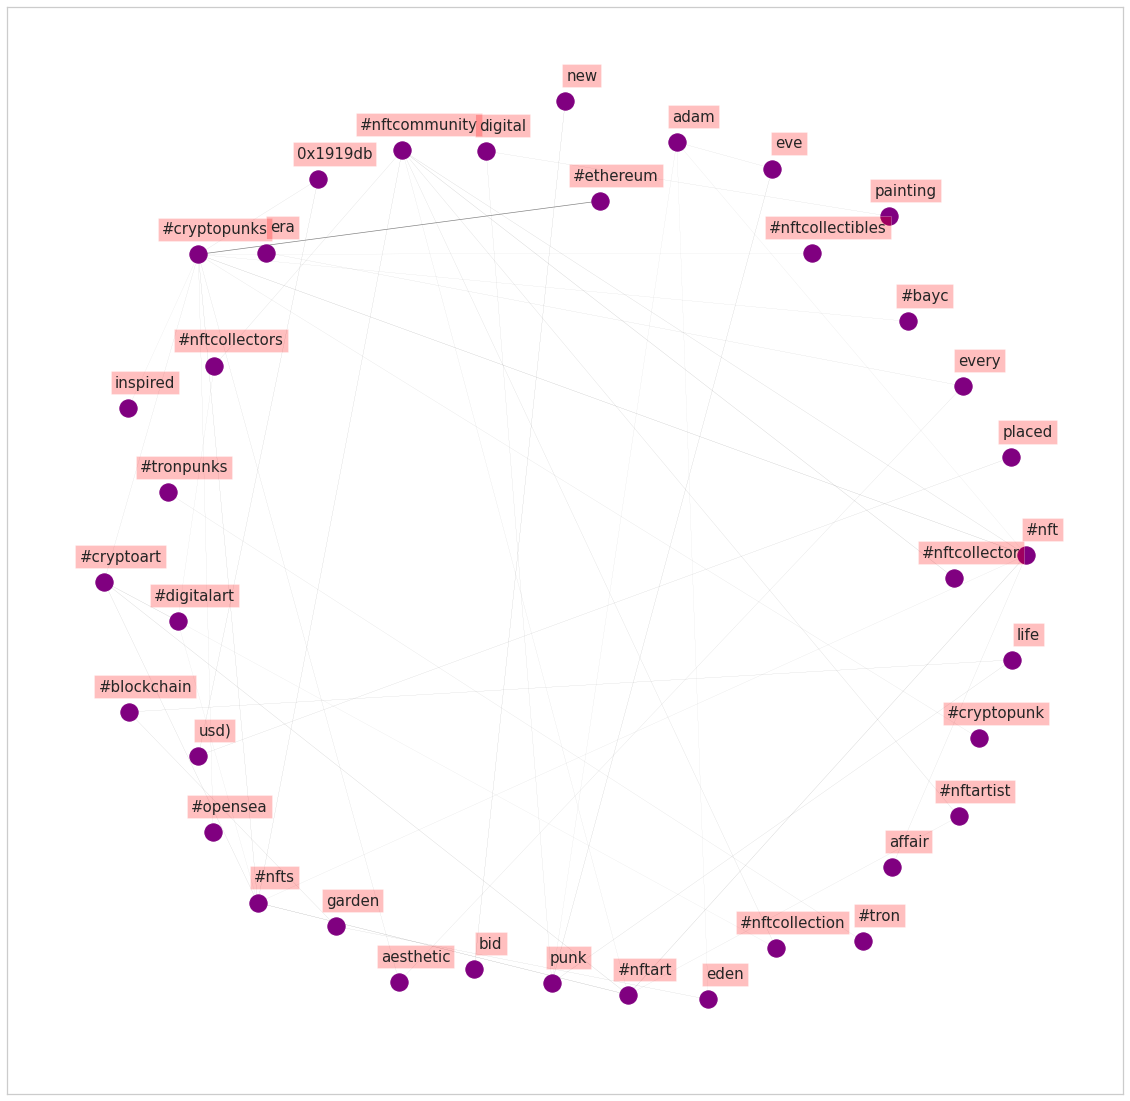

In [130]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=10)
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]


# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)
plt.grid(None)
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=15)
    
plt.show()

In [131]:
sorted(G.degree, key=lambda x: x[1], reverse=True)

[('#cryptopunks', 11),
 ('#nftcommunity', 7),
 ('#nft', 6),
 ('#nfts', 6),
 ('#nftart', 5),
 ('#cryptoart', 4),
 ('#digitalart', 4),
 ('punk', 4),
 ('adam', 4),
 ('eve', 2),
 ('usd)', 2),
 ('0x1919db', 2),
 ('#nftartist', 2),
 ('life', 2),
 ('#blockchain', 2),
 ('garden', 2),
 ('eden', 2),
 ('#nftcollection', 2),
 ('#nftcollectors', 2),
 ('digital', 2),
 ('aesthetic', 2),
 ('every', 2),
 ('#ethereum', 1),
 ('#nftcollector', 1),
 ('new', 1),
 ('bid', 1),
 ('placed', 1),
 ('#bayc', 1),
 ('painting', 1),
 ('era', 1),
 ('affair', 1),
 ('#tronpunks', 1),
 ('#tron', 1),
 ('#cryptopunk', 1),
 ('#opensea', 1),
 ('#nftcollectibles', 1),
 ('inspired', 1)]

In [132]:
nx.betweenness_centrality(G)


{'#cryptopunks': 0.48201058201058194,
 '#ethereum': 0.0,
 '#nft': 0.4095767195767196,
 '#nfts': 0.09407407407407406,
 '#nftart': 0.03153439153439155,
 '#nftcommunity': 0.13222222222222227,
 '#cryptoart': 0.03275132275132274,
 '#digitalart': 0.02619047619047619,
 '#nftcollector': 0.0,
 'eve': 0.0,
 'punk': 0.15873015873015872,
 'new': 0.0,
 'bid': 0.0,
 'usd)': 0.049206349206349205,
 '0x1919db': 0.09523809523809523,
 '#nftartist': 0.0,
 'placed': 0.0,
 'life': 0.02857142857142857,
 '#blockchain': 0.004761904761904762,
 'garden': 0.022222222222222223,
 'eden': 0.06349206349206349,
 '#bayc': 0.0,
 '#nftcollection': 0.0013756613756613755,
 '#nftcollectors': 0.0013756613756613755,
 'digital': 0.049206349206349205,
 'painting': 0.0,
 'aesthetic': 0.09523809523809523,
 'every': 0.049206349206349205,
 'era': 0.0,
 'adam': 0.31587301587301586,
 'affair': 0.0,
 '#tronpunks': 0.0,
 '#tron': 0.0,
 '#cryptopunk': 0.0,
 '#opensea': 0.0,
 '#nftcollectibles': 0.0,
 'inspired': 0.0}